In [265]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import norm
import statsmodels.api as sm
from arch.unitroot import ADF
from statsmodels.discrete.discrete_model import Probit

In [266]:
DEFAULT_FIGSIZE = (48,18)
plt.rc("figure", figsize=DEFAULT_FIGSIZE)
plt.rc("font", size=48)

def plot(s, y=DEFAULT_FIGSIZE):
    #figsize(y=y)
    fig, ax = plt.subplots(1, 1)
    if isinstance(s, pd.Series):
        s.plot(ax=ax, legend=False, color=["orange"])
    else:
        s.plot(ax=ax, legend=False)
        fig.legend(frameon=False)
    
    ax.set_xlabel(None)
    ax.set_xlim(s.index[0], s.index[-1]) #s.index[0]

    plt.axhline(0.5, 0,1,color="black",linestyle=":")
    sns.despine()
    fig.tight_layout(pad=1.0)
    #figsize()

In [5]:
## is a questionable decision to use dm: essentially stating forecast only lost if it lost really really badly

def diebold_mariano(loss_a, loss_b, nw_bandwidth,cv):
    delta = loss_a - loss_b
    mod = sm.OLS(delta, np.ones_like(delta))
    dm_res = mod.fit(cov_type="HAC", cov_kwds={"maxlags":int(nw_bandwidth)})
    av_diff = delta.mean()
    a  = dm_res.bse[0]
    dm_stat = float(av_diff / a)  

    #cv = norm.ppf(0.975)

    if dm_stat < (cv * -1):
        concl = 1
    else:
        concl = 0


    return concl

QUESTION 1
--

In [8]:
# Simulate some data
# run time ~ 1 minute

# True simulated data ## Sample size 100
rg = np.random.RandomState(100)

r = [0.90, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]
runs = 10000
true_100 = {}
size = 100
nw = size ** (1/3)
cv = norm.ppf(0.95)
theta_100 = []
dm_100 = []

for rho in r:
    print(rho)
    for run in range(runs):
        start = rg.normal(0,1/(1-(rho**2)))
        run_holder = []
        run_holder.append(start)

        for i in range(1,size):
            shock = rg.standard_normal()
            last_val = run_holder[-1]
            new_val = last_val * rho + shock
            run_holder.append(new_val)

        y = np.asarray(run_holder)

        # Fit using first half, tau//2
        mod = AutoReg(y[:size//2], lags=1, trend="c", old_names=False)
        res = mod.fit()

        # Full-sample model
        oos_mod = AutoReg(y, lags=1, trend="c", old_names=False)

        # One-step predictions
        oos_1step = oos_mod.predict(res.params)

        # OOS Random Walk predictions
        oos_rw = oos_mod.predict([0, 1])

        # Get second half of both
        # Use -tau//2: to get second half
        oos_1step = oos_1step[-size//2:]
        oos_rw = oos_rw[-size//2:]

        # Calculate the losses
        loss_1step = (oos_1step - y[-size//2:]) ** 2
        loss_rw = (oos_rw - y[-size//2:]) ** 2

        evaluation = (loss_1step - loss_rw).sum()

        if evaluation > 0:
            mark = 1
        else:
            mark = 0

        # Append the estimated thetas and the DM results into lists
        theta_100.append(res.params[1])
        dm_100.append(mark)

        #dm_100.append(diebold_mariano( loss_rw, loss_1step, nw, cv))

theta_100 = np.asarray(theta_100)
dm_100 = np.asarray(dm_100)

# Simulate some data --------------------------------------------- Sample size 250
# run time ~ 1 minute

# True simulated data ## Sample size 250
rg = np.random.RandomState(100)

true_250 = {}
size = 250
nw = size ** (1/3)
cv = norm.ppf(0.95)
theta_250 = []
dm_250 = []

for rho in r:
    print(rho)
    for run in range(runs):
        start = rg.normal(0,1/(1-(rho**2)))
        run_holder = []
        run_holder.append(start)

        for i in range(1,size):
            shock = rg.standard_normal()
            last_val = run_holder[-1]
            new_val = last_val * rho + shock
            run_holder.append(new_val)

        y = np.asarray(run_holder)

        # Fit using first half, tau//2
        mod = AutoReg(y[:size//2], lags=1, trend="c", old_names=False)
        res = mod.fit()

        # Full-sample model
        oos_mod = AutoReg(y, lags=1, trend="c", old_names=False)

        # One-step predictions
        oos_1step = oos_mod.predict(res.params)

        # OOS Random Walk predictions
        oos_rw = oos_mod.predict([0, 1])

        # Get second half of both
        # Use -tau//2: to get second half
        oos_1step = oos_1step[-size//2:]
        oos_rw = oos_rw[-size//2:]

        # Calculate the losses
        loss_1step = (oos_1step - y[-size//2:]) ** 2
        loss_rw = (oos_rw - y[-size//2:]) ** 2

        evaluation = (loss_1step - loss_rw).sum()

        if evaluation > 0:
            mark = 1
        else:
            mark = 0

        # Append the estimated thetas and the DM results into lists
        theta_250.append(res.params[1])
        dm_250.append(mark)

        #dm_250.append(diebold_mariano( loss_rw, loss_1step, nw, cv))

theta_250 = np.asarray(theta_250)
dm_250 = np.asarray(dm_250)

# Simulate some data --------------------------------------------- Sample size 500
# run time ~ 1 minute

# True simulated data ## Sample size 500
rg = np.random.RandomState(100)

true_500 = {}
size = 500
nw = size ** (1/3)
cv = norm.ppf(0.95)
theta_500 = []
dm_500 = []

for rho in r:
    print(rho)
    for run in range(runs):
        start = rg.normal(0,1/(1-(rho**2)))
        run_holder = []
        run_holder.append(start)

        for i in range(1,size):
            shock = rg.standard_normal()
            last_val = run_holder[-1]
            new_val = last_val * rho + shock
            run_holder.append(new_val)

        y = np.asarray(run_holder)

        # Fit using first half, tau//2
        mod = AutoReg(y[:size//2], lags=1, trend="c", old_names=False)
        res = mod.fit()

        # Full-sample model
        oos_mod = AutoReg(y, lags=1, trend="c", old_names=False)

        # One-step predictions
        oos_1step = oos_mod.predict(res.params)

        # OOS Random Walk predictions
        oos_rw = oos_mod.predict([0, 1])

        # Get second half of both
        # Use -tau//2: to get second half
        oos_1step = oos_1step[-size//2:]
        oos_rw = oos_rw[-size//2:]

        # Calculate the losses
        loss_1step = (oos_1step - y[-size//2:]) ** 2
        loss_rw = (oos_rw - y[-size//2:]) ** 2

        evaluation = (loss_1step - loss_rw).sum()

        if evaluation > 0:
            mark = 1
        else:
            mark = 0

        # Append the estimated thetas and the DM results into lists
        theta_500.append(res.params[1])
        dm_500.append(mark)

        #dm_500.append(diebold_mariano( loss_rw, loss_1step, nw, cv))

theta_500 = np.asarray(theta_500)
dm_500 = np.asarray(dm_500)

0.9
0.91
0.92
0.93
0.94
0.95
0.96
0.97
0.98
0.99
0.9
0.91
0.92
0.93
0.94
0.95
0.96
0.97
0.98
0.99
0.9
0.91
0.92
0.93
0.94
0.95
0.96
0.97
0.98
0.99


averaging data

In [383]:
# averaging realised fail rates
app_dist_100 = pd.DataFrame([theta_100,dm_100]).T
app_dist_100.columns = ["Theta^", "DM res"]
app_dist_100 = app_dist_100.sort_values("Theta^")

sampled_theta = []
sampled_dm = []
spacing = 500

block = [10000,20000,30000,40000,50000,60000,70000,80000,90000]
# two number multiply to give total runs * rho
for i in range(100000):
    if i in block:
        print(i)
    start = i - spacing
    end = i + spacing
    sampled_theta.append(app_dist_100["Theta^"][start:end].mean())
    sampled_dm.append(app_dist_100["DM res"][start:end].mean())

sampled_theta = np.asarray(sampled_theta)
sampled_dm = np.asarray(sampled_dm)

app_dist_100 = pd.DataFrame([sampled_theta,sampled_dm]).T
app_dist_100.columns = ["Theta^", "DM res"]
app_dist_100 = app_dist_100.dropna()

#-----------------------------------------------------------------------------------------------------------

# averaging realised fail rates: 250
app_dist_250 = pd.DataFrame([theta_250,dm_250]).T
app_dist_250.columns = ["Theta^", "DM res"]
app_dist_250 = app_dist_250.sort_values("Theta^")

sampled_theta = []
sampled_dm = []

block = [10000,20000,30000,40000,50000,60000,70000,80000,90000]
# two number multiply to give total runs * rho
for i in range(100000):
    if i in block:
        print(i)
    start = i - spacing
    end = i + spacing
    sampled_theta.append(app_dist_250["Theta^"][start:end].mean())
    sampled_dm.append(app_dist_250["DM res"][start:end].mean())

sampled_theta = np.asarray(sampled_theta)
sampled_dm = np.asarray(sampled_dm)

app_dist_250 = pd.DataFrame([sampled_theta,sampled_dm]).T
app_dist_250.columns = ["Theta^", "DM res"]
app_dist_250 = app_dist_250.dropna()

#-----------------------------------------------------------------------------------------------------------

# averaging realised fail rates: 500
app_dist_500 = pd.DataFrame([theta_500,dm_500]).T
app_dist_500.columns = ["Theta^", "DM res"]
app_dist_500 = app_dist_500.sort_values("Theta^")

sampled_theta = []
sampled_dm = []

block = [10000,20000,30000,40000,50000,60000,70000,80000,90000]
# two number multiply to give total runs * rho
for i in range(100000):
    if i in block:
        print(i)
    start = i - spacing
    end = i + spacing
    sampled_theta.append(app_dist_500["Theta^"][start:end].mean())
    sampled_dm.append(app_dist_500["DM res"][start:end].mean())

sampled_theta = np.asarray(sampled_theta)
sampled_dm = np.asarray(sampled_dm)

app_dist_500 = pd.DataFrame([sampled_theta,sampled_dm]).T
app_dist_500.columns = ["Theta^", "DM res"]
app_dist_500 = app_dist_500.dropna()

10000
20000
30000
40000
50000
60000
70000
80000
90000
10000
20000
30000
40000
50000
60000
70000
80000
90000
10000
20000
30000
40000
50000
60000
70000
80000
90000


full plots

In [384]:
# careful, only run in order

combined_dframe_1 = pd.DataFrame([app_dist_100["DM res"],app_dist_250["DM res"], app_dist_500["DM res"],app_dist_250["Theta^"]]).T
combined_dframe_1.columns = ["Failure rate, size = 100","Failure rate, size = 250","Failure rate, size = 500","Theta^"]
combined_dframe_1.index = combined_dframe_1["Theta^"]
combined_dframe_1 =  combined_dframe_1.drop("Theta^",axis=1)

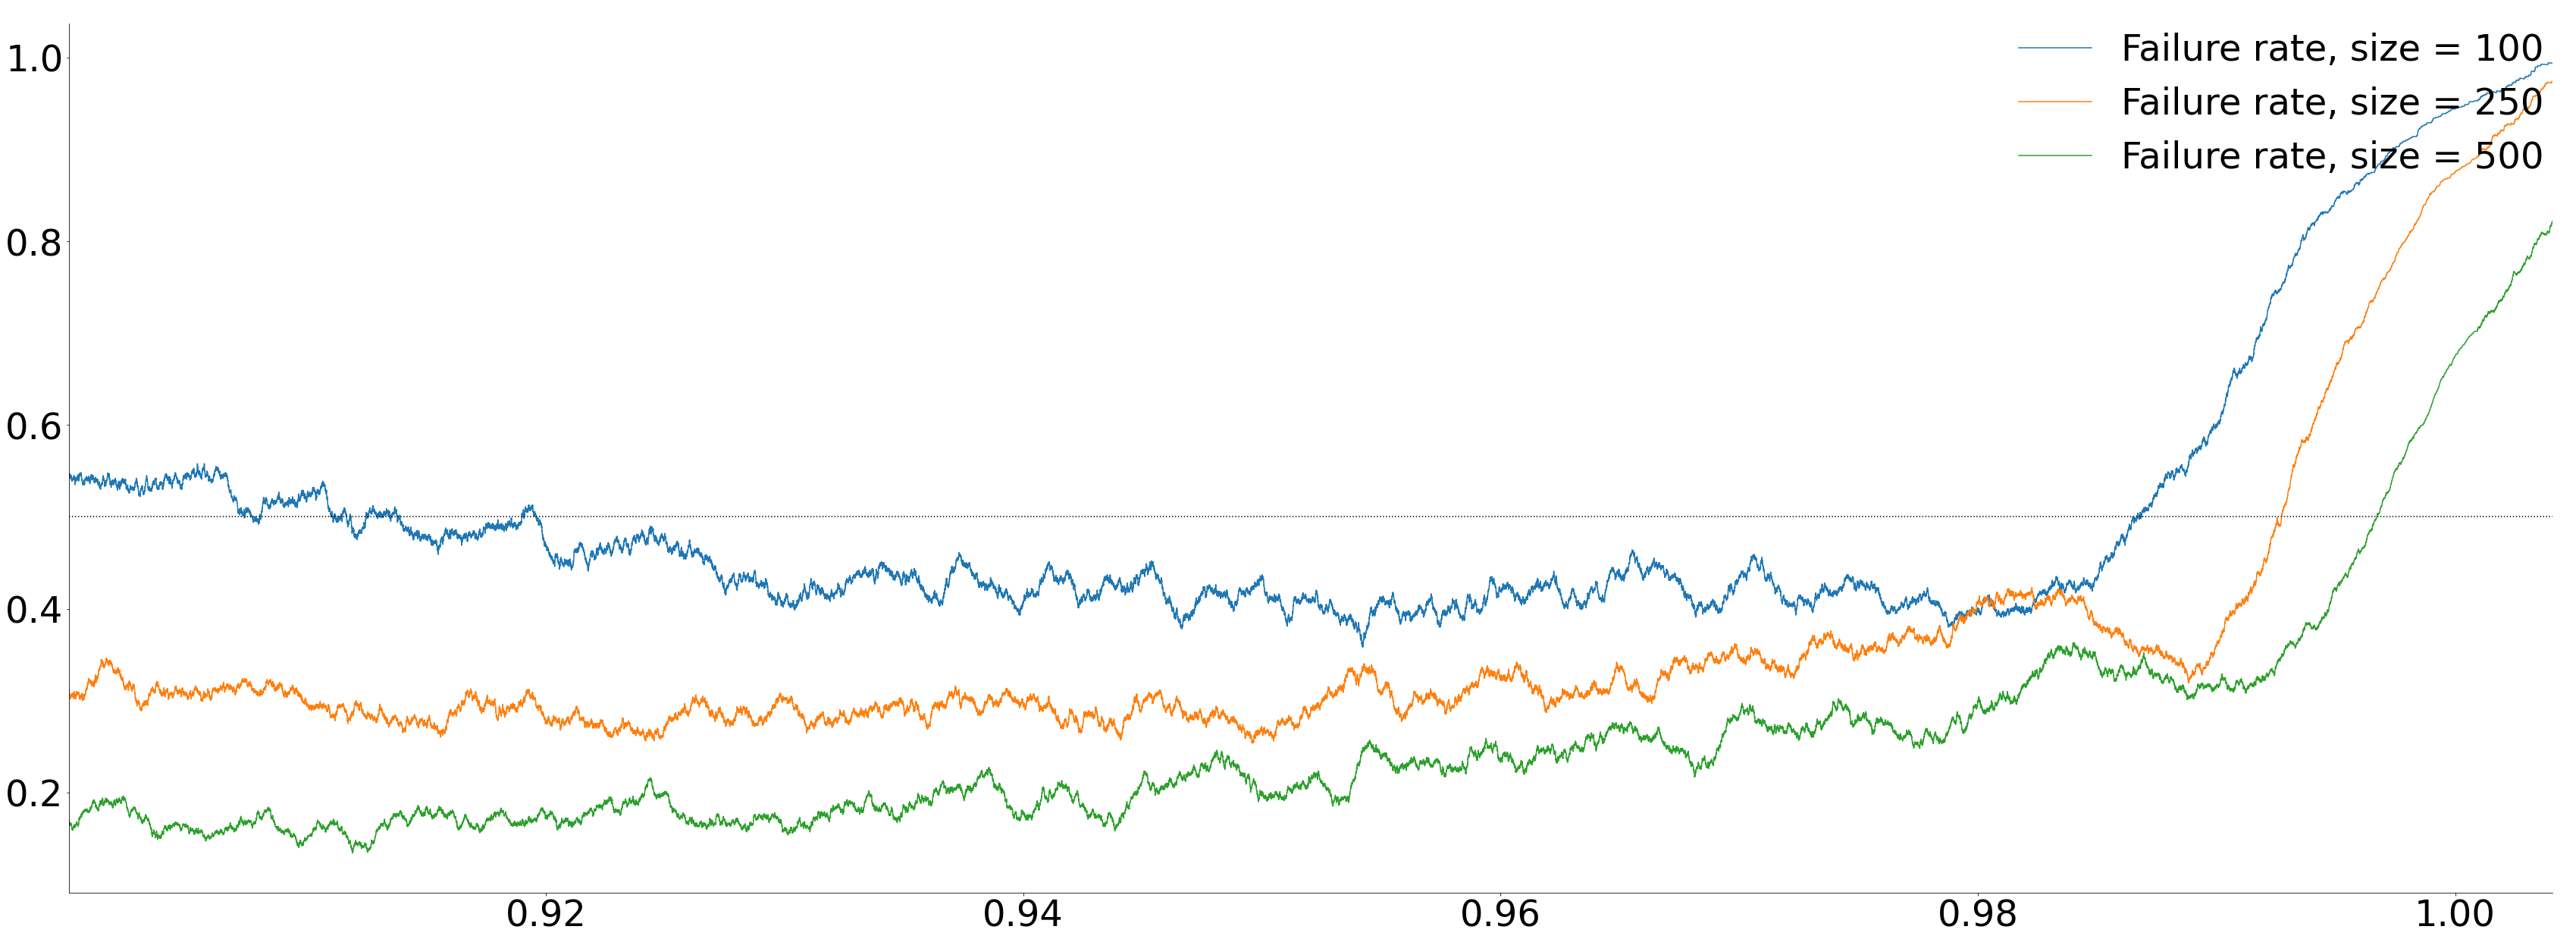

In [388]:
plot(combined_dframe_1[0.9:])

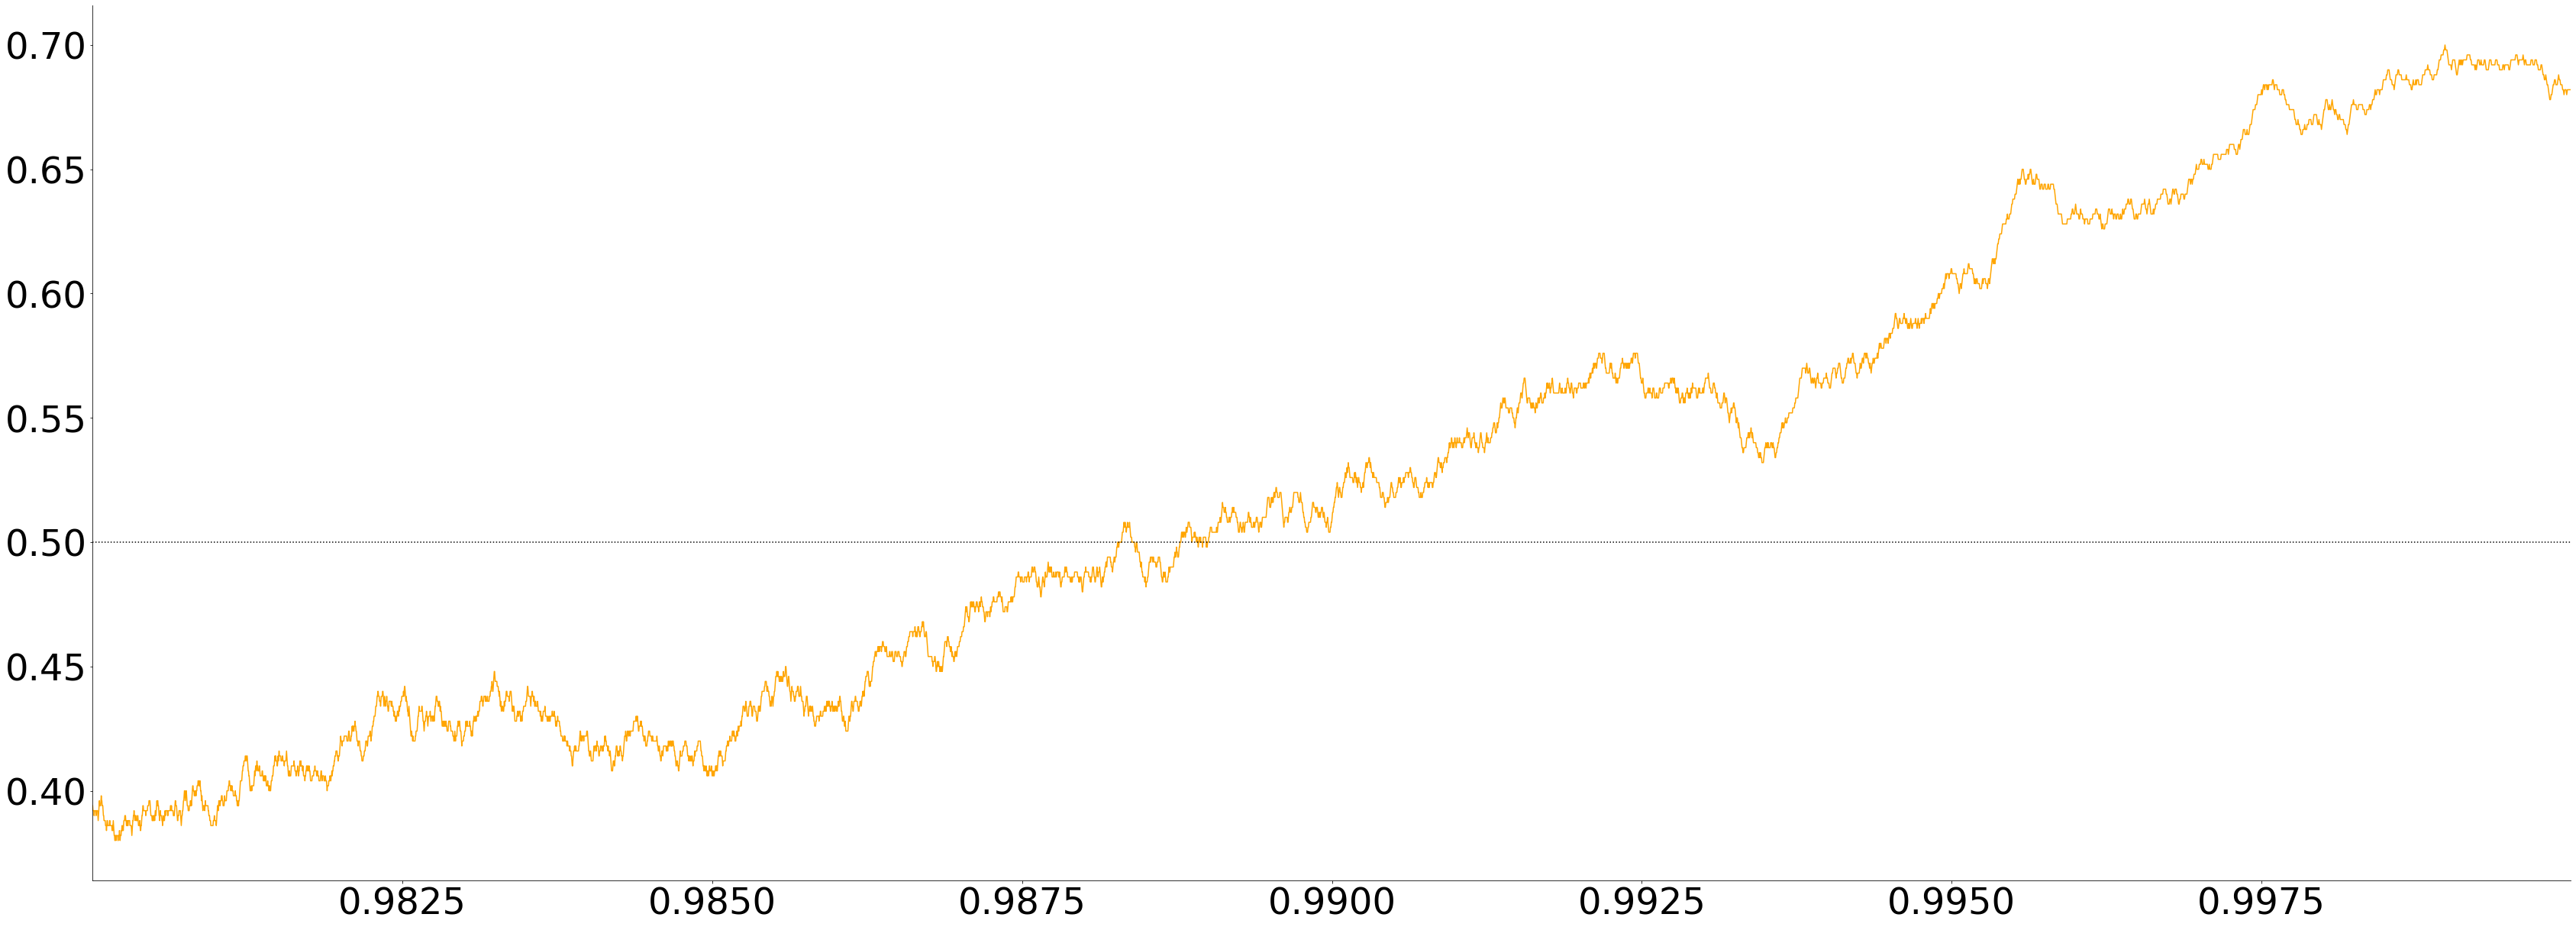

In [94]:
# Full Plot - see the issue of extreme underestimation in half the sample when showing full sample : hence restrict between 0.9 and 1.03 # 100
app_dist_100.index =app_dist_100["Theta^"]
plot(app_dist_100["DM res"][0.98:1.0])

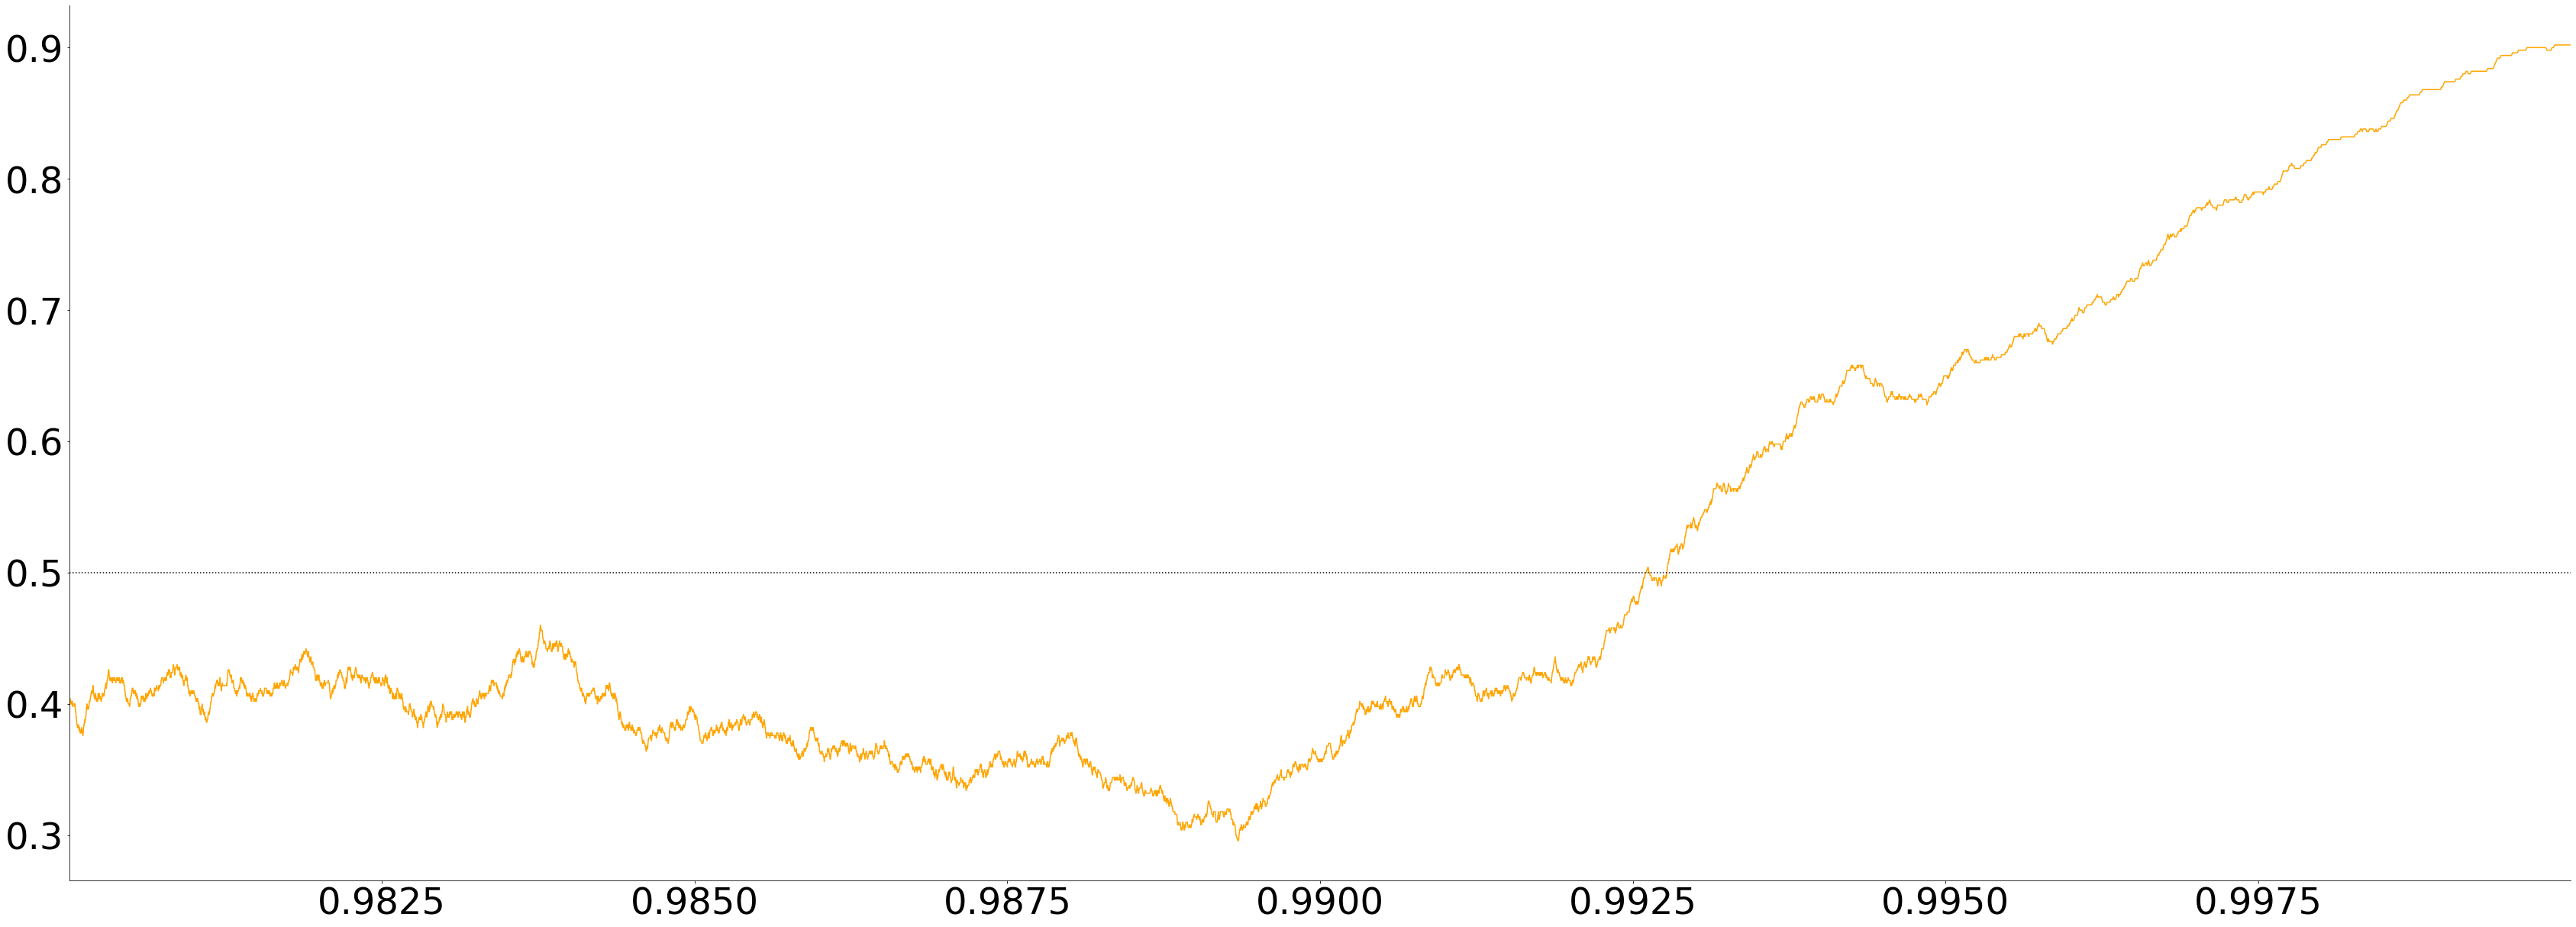

In [95]:
# Full Plot - see the issue of extreme underestimation in half the sample when showing full sample : hence restrict between 0.9 and 1.03 # 250
app_dist_250.index =app_dist_250["Theta^"]
plot(app_dist_250["DM res"][0.98:1])

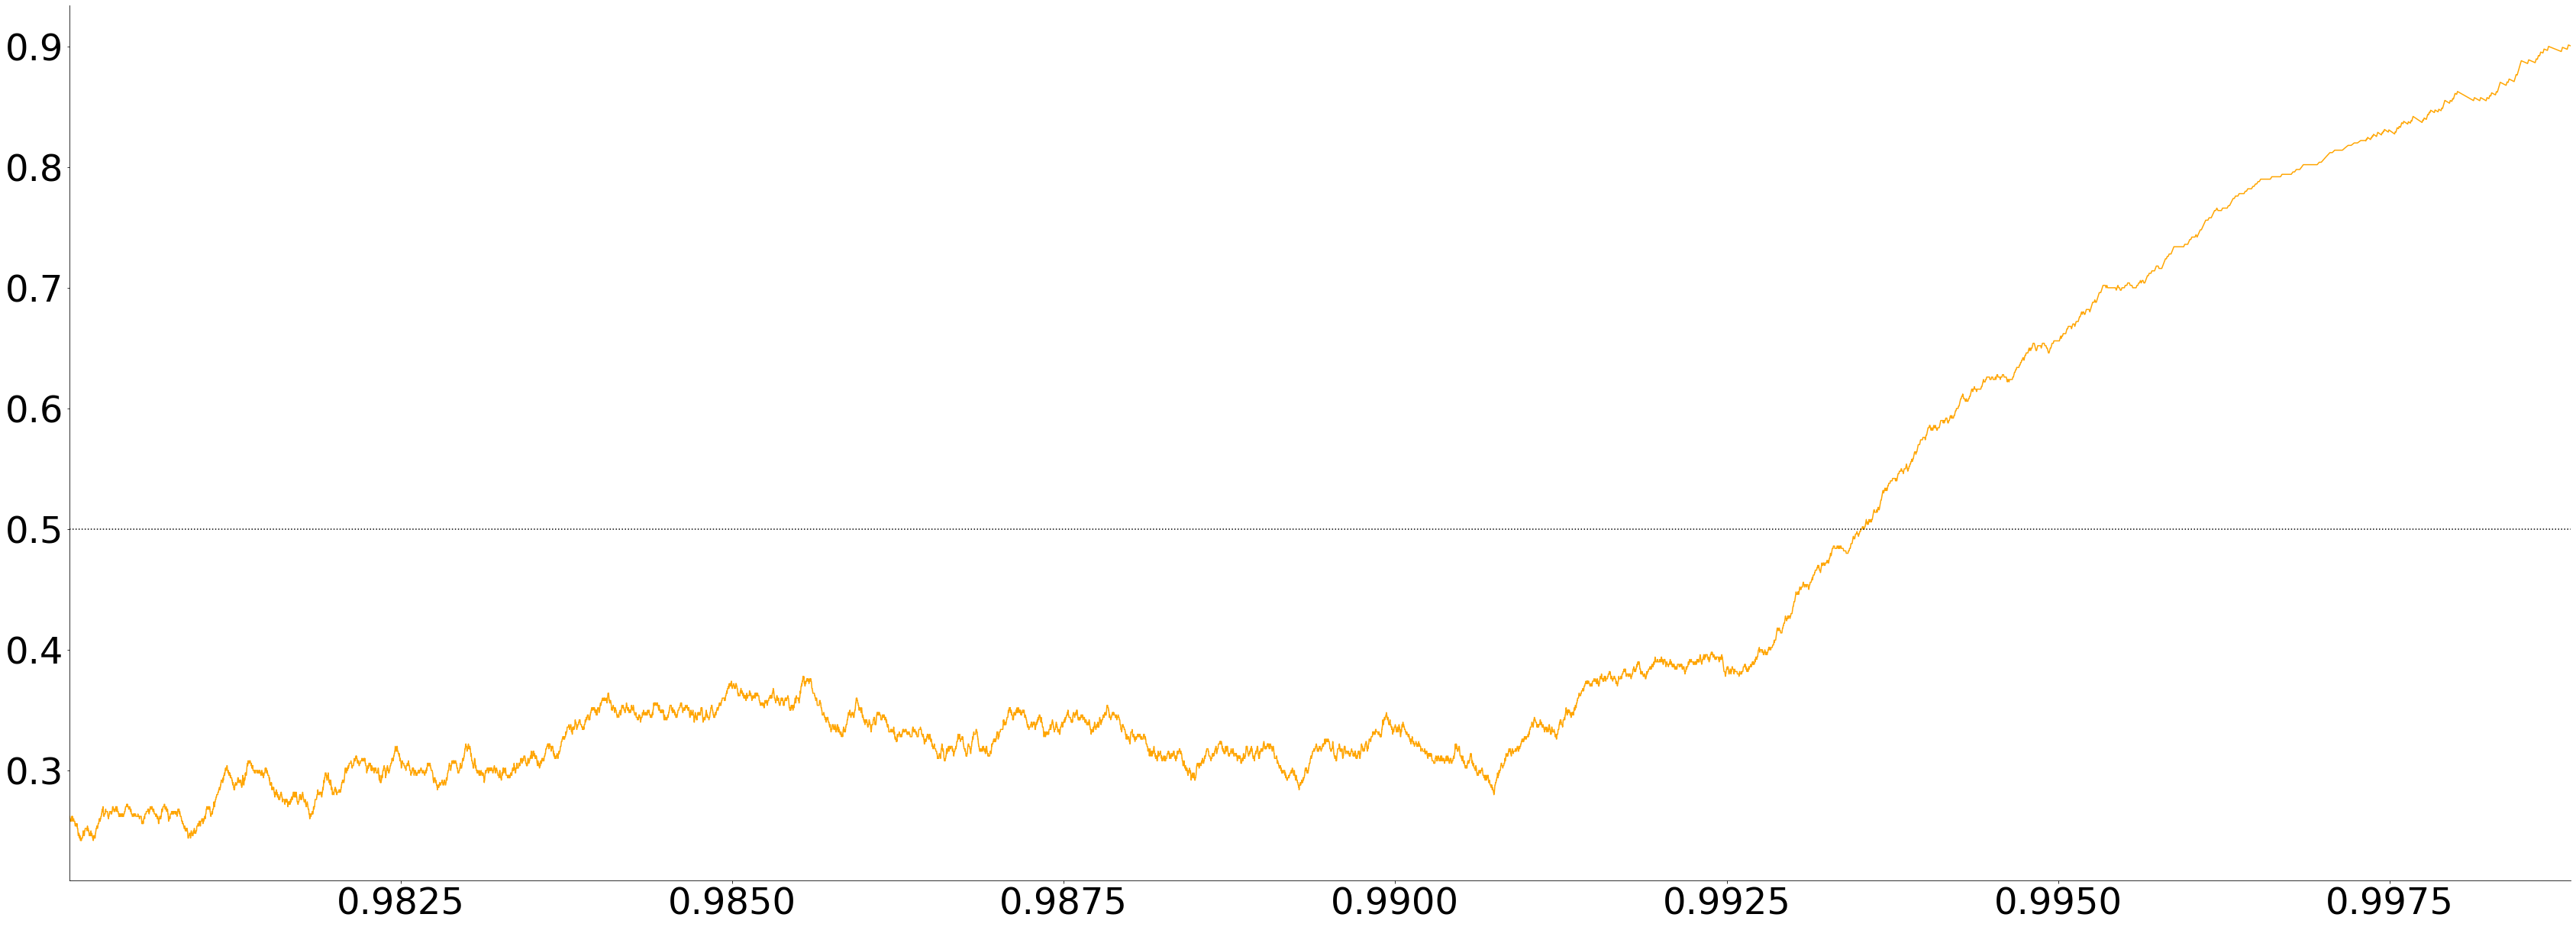

In [96]:
# Full Plot - see the issue of extreme underestimation in half the sample when showing full sample : hence restrict between 0.9 and 1.03 # 500
app_dist_500.index =app_dist_500["Theta^"]
plot(app_dist_500["DM res"][0.98:1.0])

In [13]:

cum_app_dist_100 = pd.DataFrame([theta_100,dm_100]).T
cum_app_dist_100.columns = ["Theta^", "DM res"]
cum_app_dist_100 = cum_app_dist_100.sort_values("Theta^")
cum_app_dist_100.index = range(len(cum_app_dist_100))
for i in range(len(cum_app_dist_100)):
    cum_app_dist_100["DM res"][i] = cum_app_dist_100["DM res"][i:].mean()


cum_app_dist_250 = pd.DataFrame([theta_250,dm_250]).T
cum_app_dist_250.columns = ["Theta^", "DM res"]
cum_app_dist_250 = cum_app_dist_250.sort_values("Theta^")
cum_app_dist_250.index = range(len(cum_app_dist_250))
for i in range(len(cum_app_dist_250)):
    cum_app_dist_250["DM res"][i] = cum_app_dist_250["DM res"][i:].mean()


cum_app_dist_500 = pd.DataFrame([theta_500,dm_500]).T
cum_app_dist_500.columns = ["Theta^", "DM res"]
cum_app_dist_500 = cum_app_dist_500.sort_values("Theta^")
cum_app_dist_500.index = range(len(cum_app_dist_500))
for i in range(len(cum_app_dist_500)):
    cum_app_dist_500["DM res"][i] = cum_app_dist_500["DM res"][i:].mean()


In [351]:
test_a

0        0.532820
1        0.532815
2        0.532811
3        0.532806
4        0.532801
           ...   
99995    1.000000
99996    1.000000
99997    1.000000
99998    1.000000
99999    1.000000
Name: DM res, Length: 100000, dtype: float64

In [377]:
test_a = cum_app_dist_100["DM res"]
test_a.index = range(len(cum_app_dist_100))
test_b = cum_app_dist_250["DM res"]
test_b.index = range(len(cum_app_dist_100))
test_c = cum_app_dist_500["DM res"]
test_c.index = range(len(cum_app_dist_100))

combined_dframe_2 = pd.DataFrame([test_a,test_b,test_c]).T
combined_dframe_2.columns = ["Cumulative failure rate, size = 100","Cumulative failure rate, size = 250","Cumulative failure rate, size = 500"]
combined_dframe_2.index = cum_app_dist_250.index

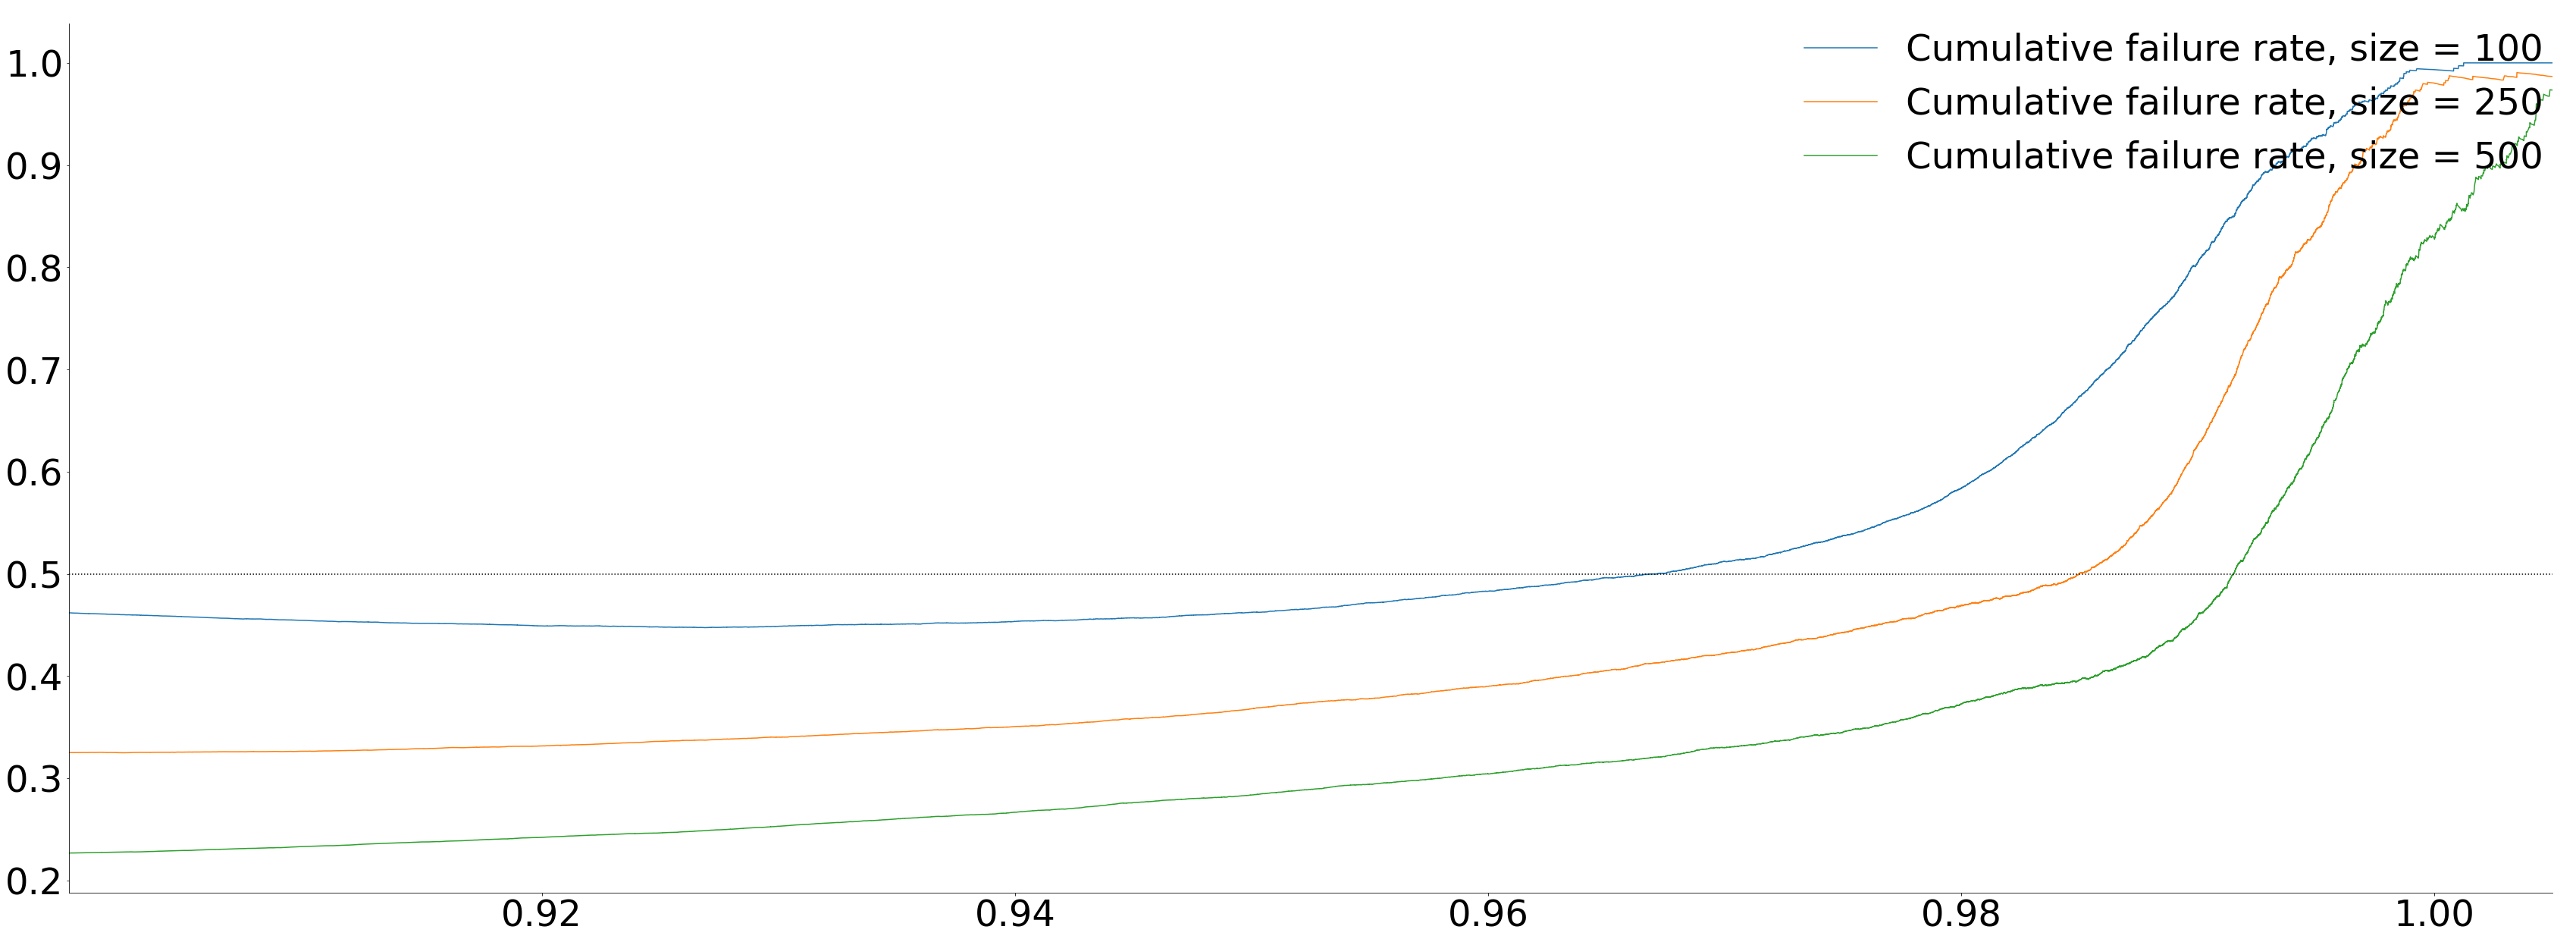

In [381]:
plot(combined_dframe_2[0.9:1.005])

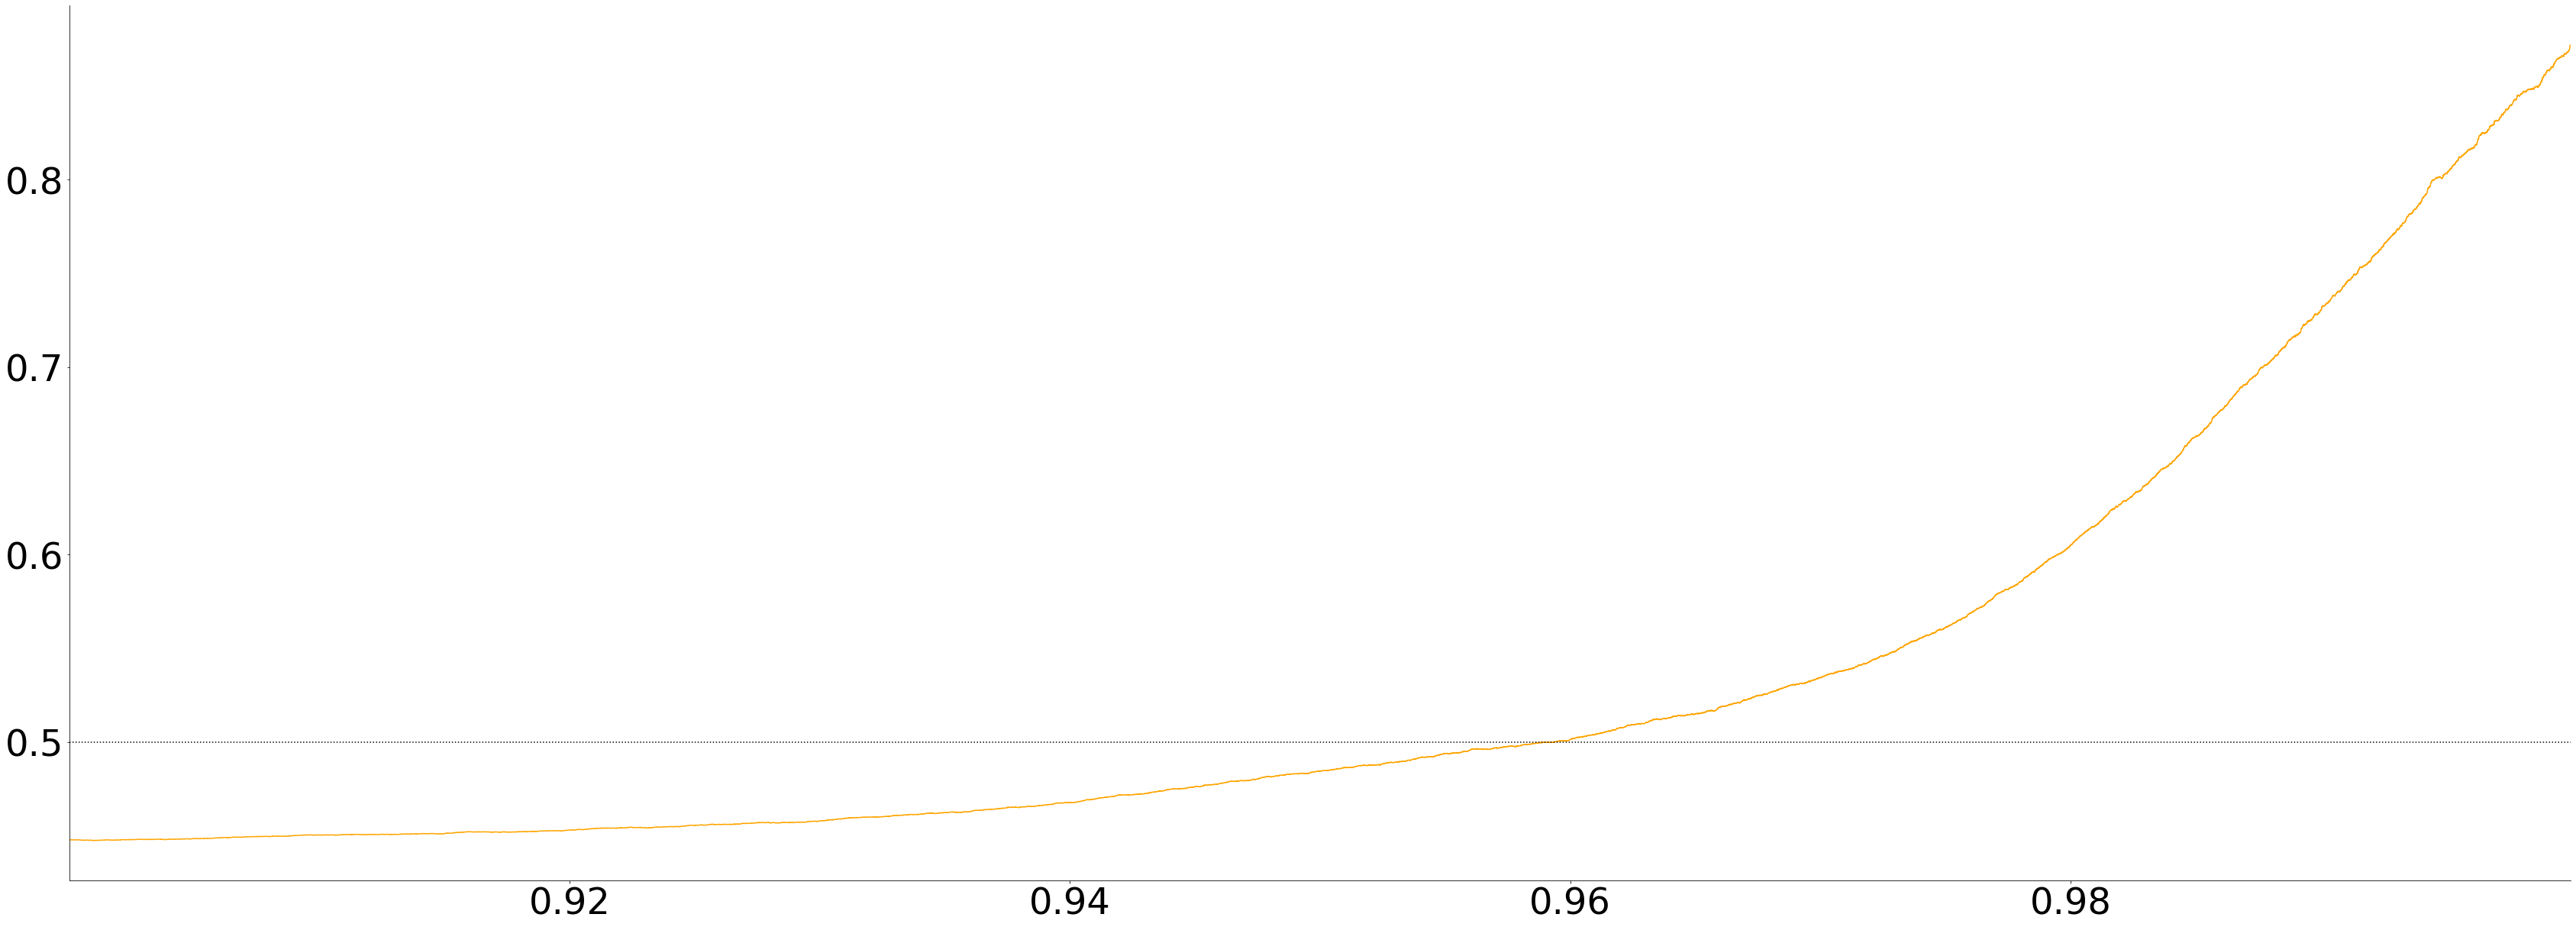

In [79]:
cum_app_dist_100.index =cum_app_dist_100["Theta^"]
plot(cum_app_dist_100["DM res"][0.9:1])

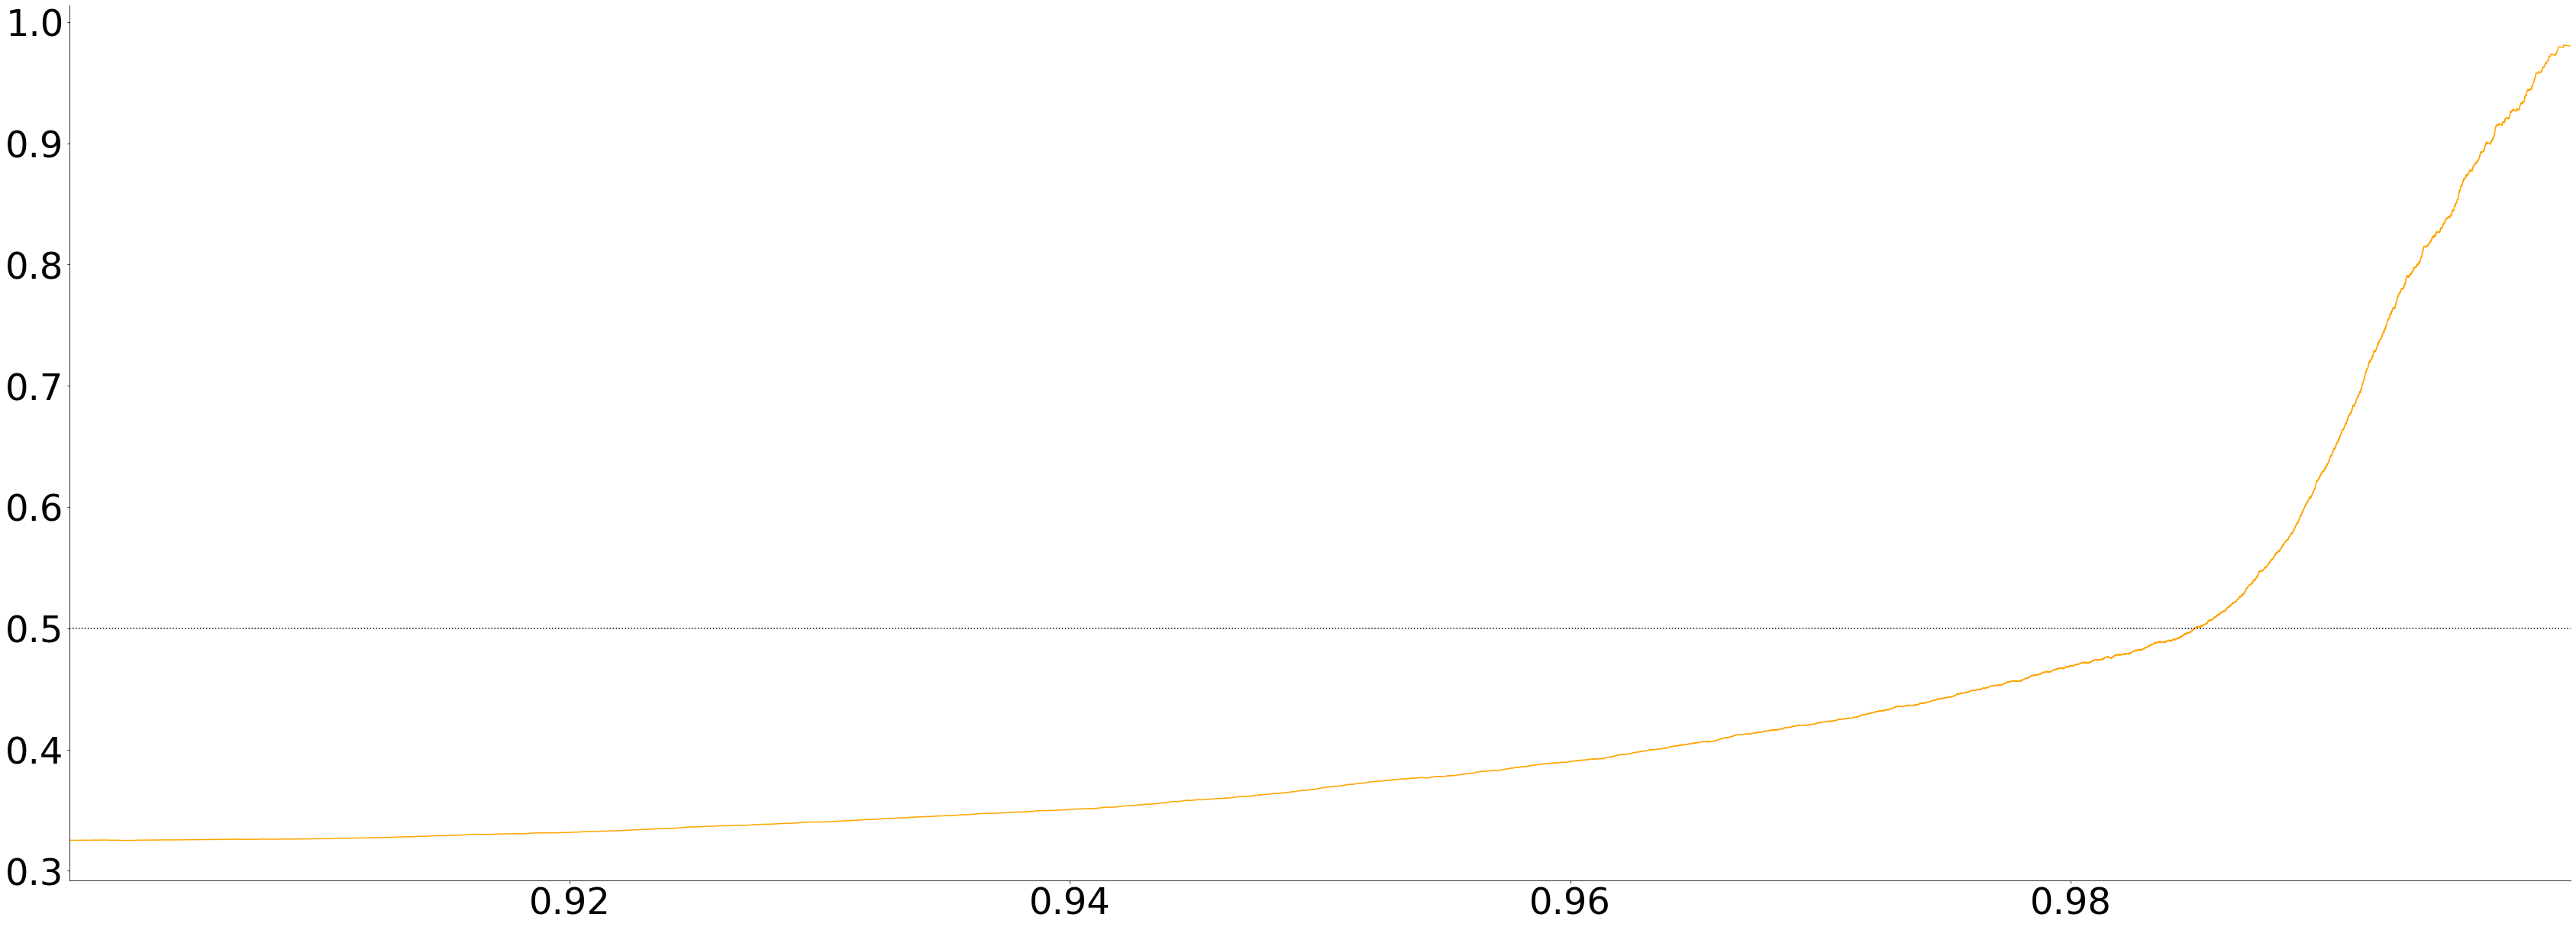

In [80]:
cum_app_dist_250.index =cum_app_dist_250["Theta^"]
plot(cum_app_dist_250["DM res"][0.9:1])

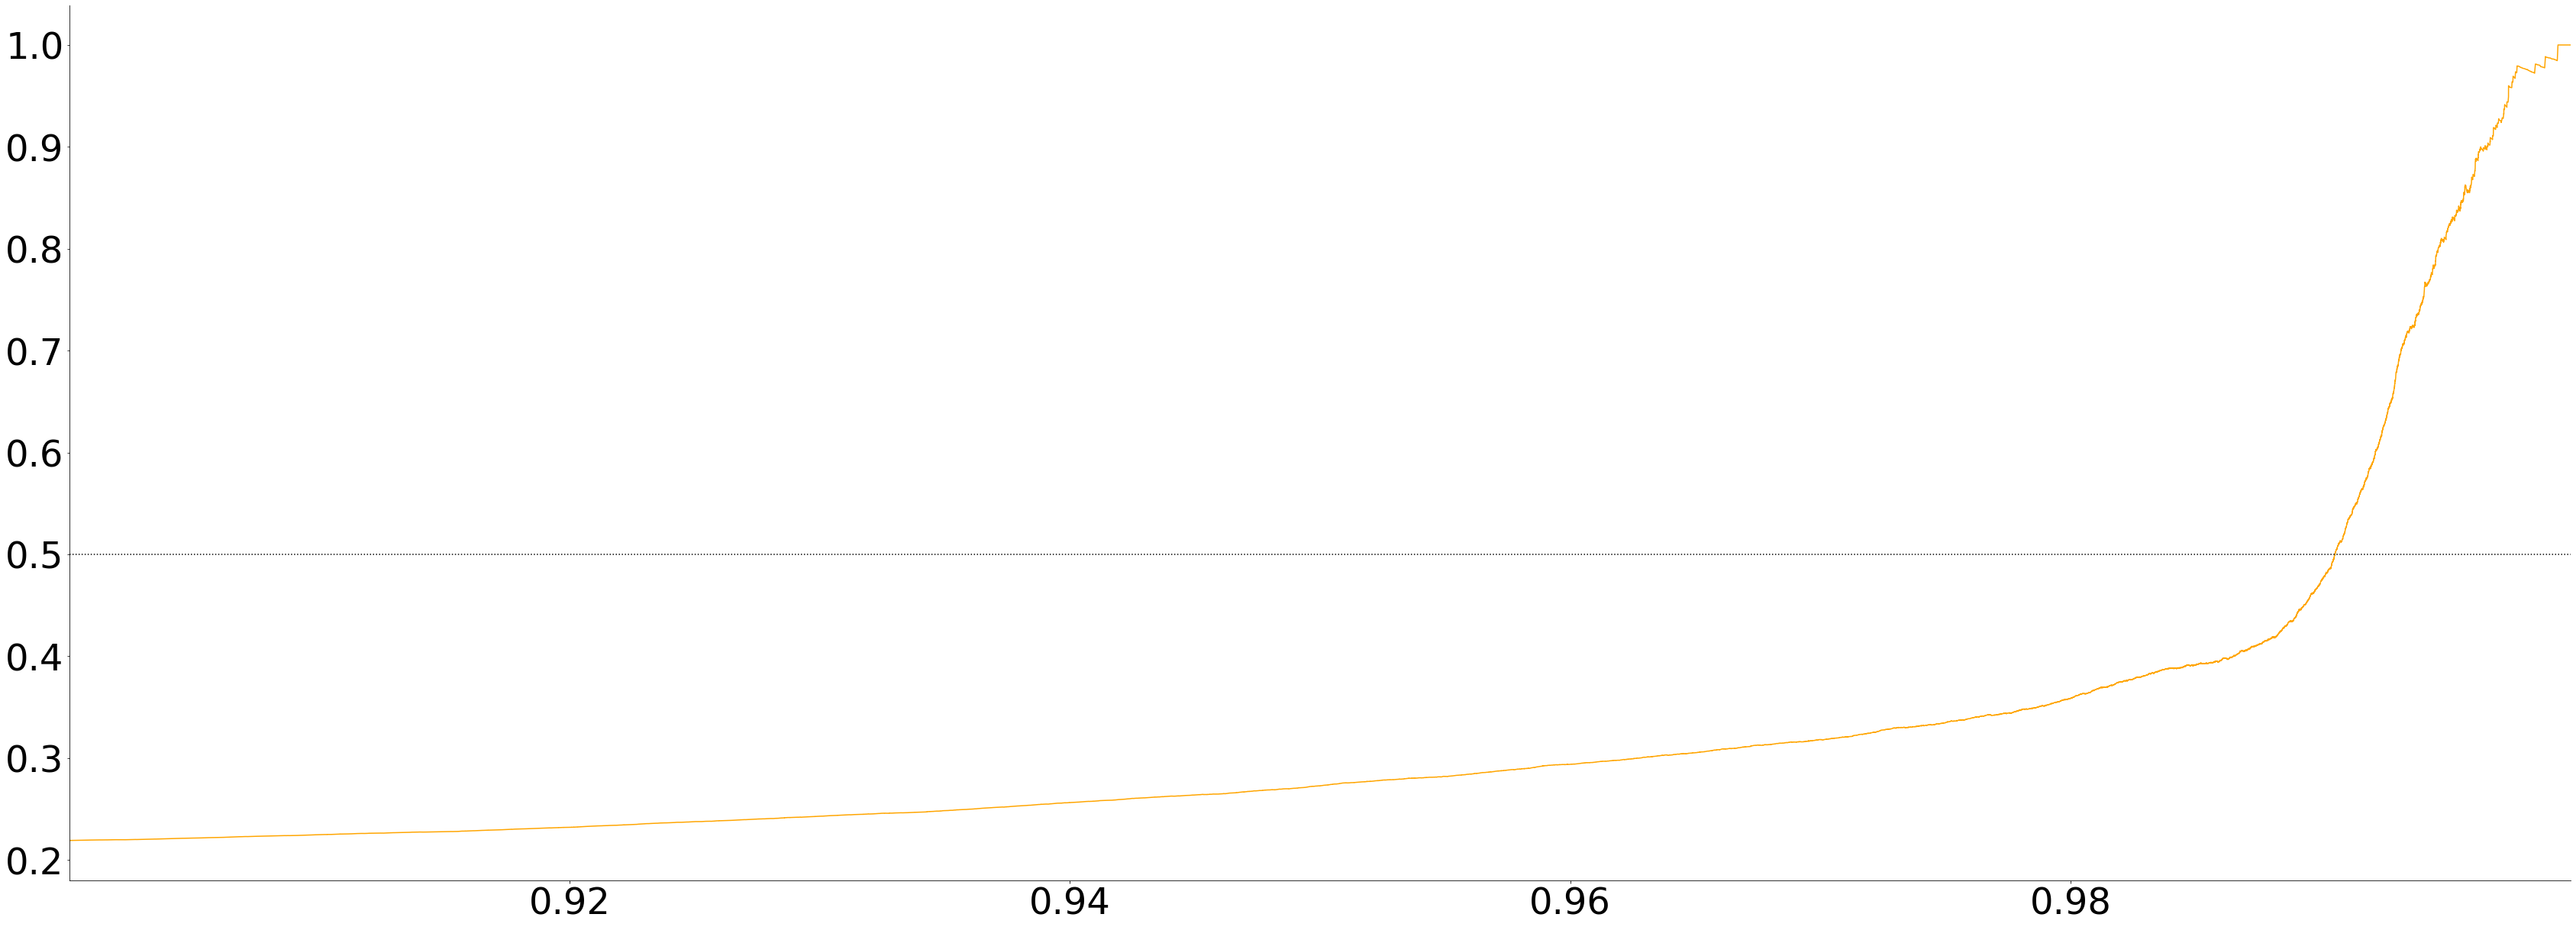

In [81]:
cum_app_dist_500.index =cum_app_dist_500["Theta^"]
plot(cum_app_dist_500["DM res"][0.9:1])

-------

------

So we would rather apply a continuous model: using the PROBIT binary regression
-----

here, just pull out100, 250 and 500 sample sizes: no need to write all out

In [389]:
#  PROBIT MODEL, with estimated thetas above 0.90

theta_250_ninety = theta_250[np.where(theta_250>0.95)]
dm_250_ninety = dm_250[np.where(theta_250>0.95)]

model = Probit(dm_250_ninety, sm.add_constant(theta_250_ninety),cov_type = "HAC")
probit_model = model.fit()
probit_model.summary()

Optimization terminated successfully.
         Current function value: 0.643684
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                31279
Model:                         Probit   Df Residuals:                    31277
Method:                           MLE   Df Model:                            1
Date:                Tue, 16 Mar 2021   Pseudo R-squ.:                 0.02162
Time:                        11:12:18   Log-Likelihood:                -20134.
converged:                       True   LL-Null:                       -20579.
Covariance Type:            nonrobust   LLR p-value:                1.716e-195
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.9060      0.526    -30.217      0.000     -16.938     -14.874
x1            16.0207      0.542     29.584      0.000      14.959      17.082
==============================================================================
"""

In [65]:
# Average marginal effect of theta on the probability at each observation
probit_model.get_margeff(at="overall", method='dydx', atexog=None, dummy=False, count=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
       Probit Marginal Effects       
=====================================
Dep. Variable:                      y
Method:                          dydx
At:                           overall
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             5.9001      0.191     30.884      0.000       5.526       6.275
==============================================================================
"""

In [62]:
# function expressing the probability of a dm rejection in terms of the estimated
norm.cdf(probit_model.params[0] + 0.9 * probit_model.params[1]).mean()

7.33377549802887e-05

In [395]:
# function expressing the average probability of a dm rejection in terms of the estimated
print(norm.cdf(probit_model.params[0] + 0.99 * probit_model.params[1]).mean())

# Value of theta at which it is better to approximate the distribution with a random walk
(norm.ppf(0.5) - probit_model.params[0]) / probit_model.params[1]

0.4818716265760729


0.992837373998007

Not sure on this downwards

In [1346]:
probit_plot = pd.DataFrame([norm.cdf(probit_model.params[0] + theta_100 * probit_model.params[1]),theta_100]).T
#probit_plot.index = theta_100
probit_plot.columns = ["Theta^", "DM res"]

sampled_theta = []
sampled_dm = []

block = [1000,2000,3000,4000,5000,6000,7000,8000,9000]
# two number multiply to give total runs * rho
for i in range(9900):
    if i in block:
        print(i)
    start = i 
    end = i + 100
    sampled_theta.append(probit_plot["Theta^"][start:end].mean())
    sampled_dm.append(probit_plot["DM res"][start:end].mean())

sampled_theta = np.asarray(sampled_theta)
sampled_dm = np.asarray(sampled_dm)

probit_plot = pd.DataFrame([sampled_theta,sampled_dm]).T
probit_plot.columns = ["DM res","Theta^"]

#plot(probit_plot)

1000
2000
3000
4000
5000
6000
7000
8000
9000


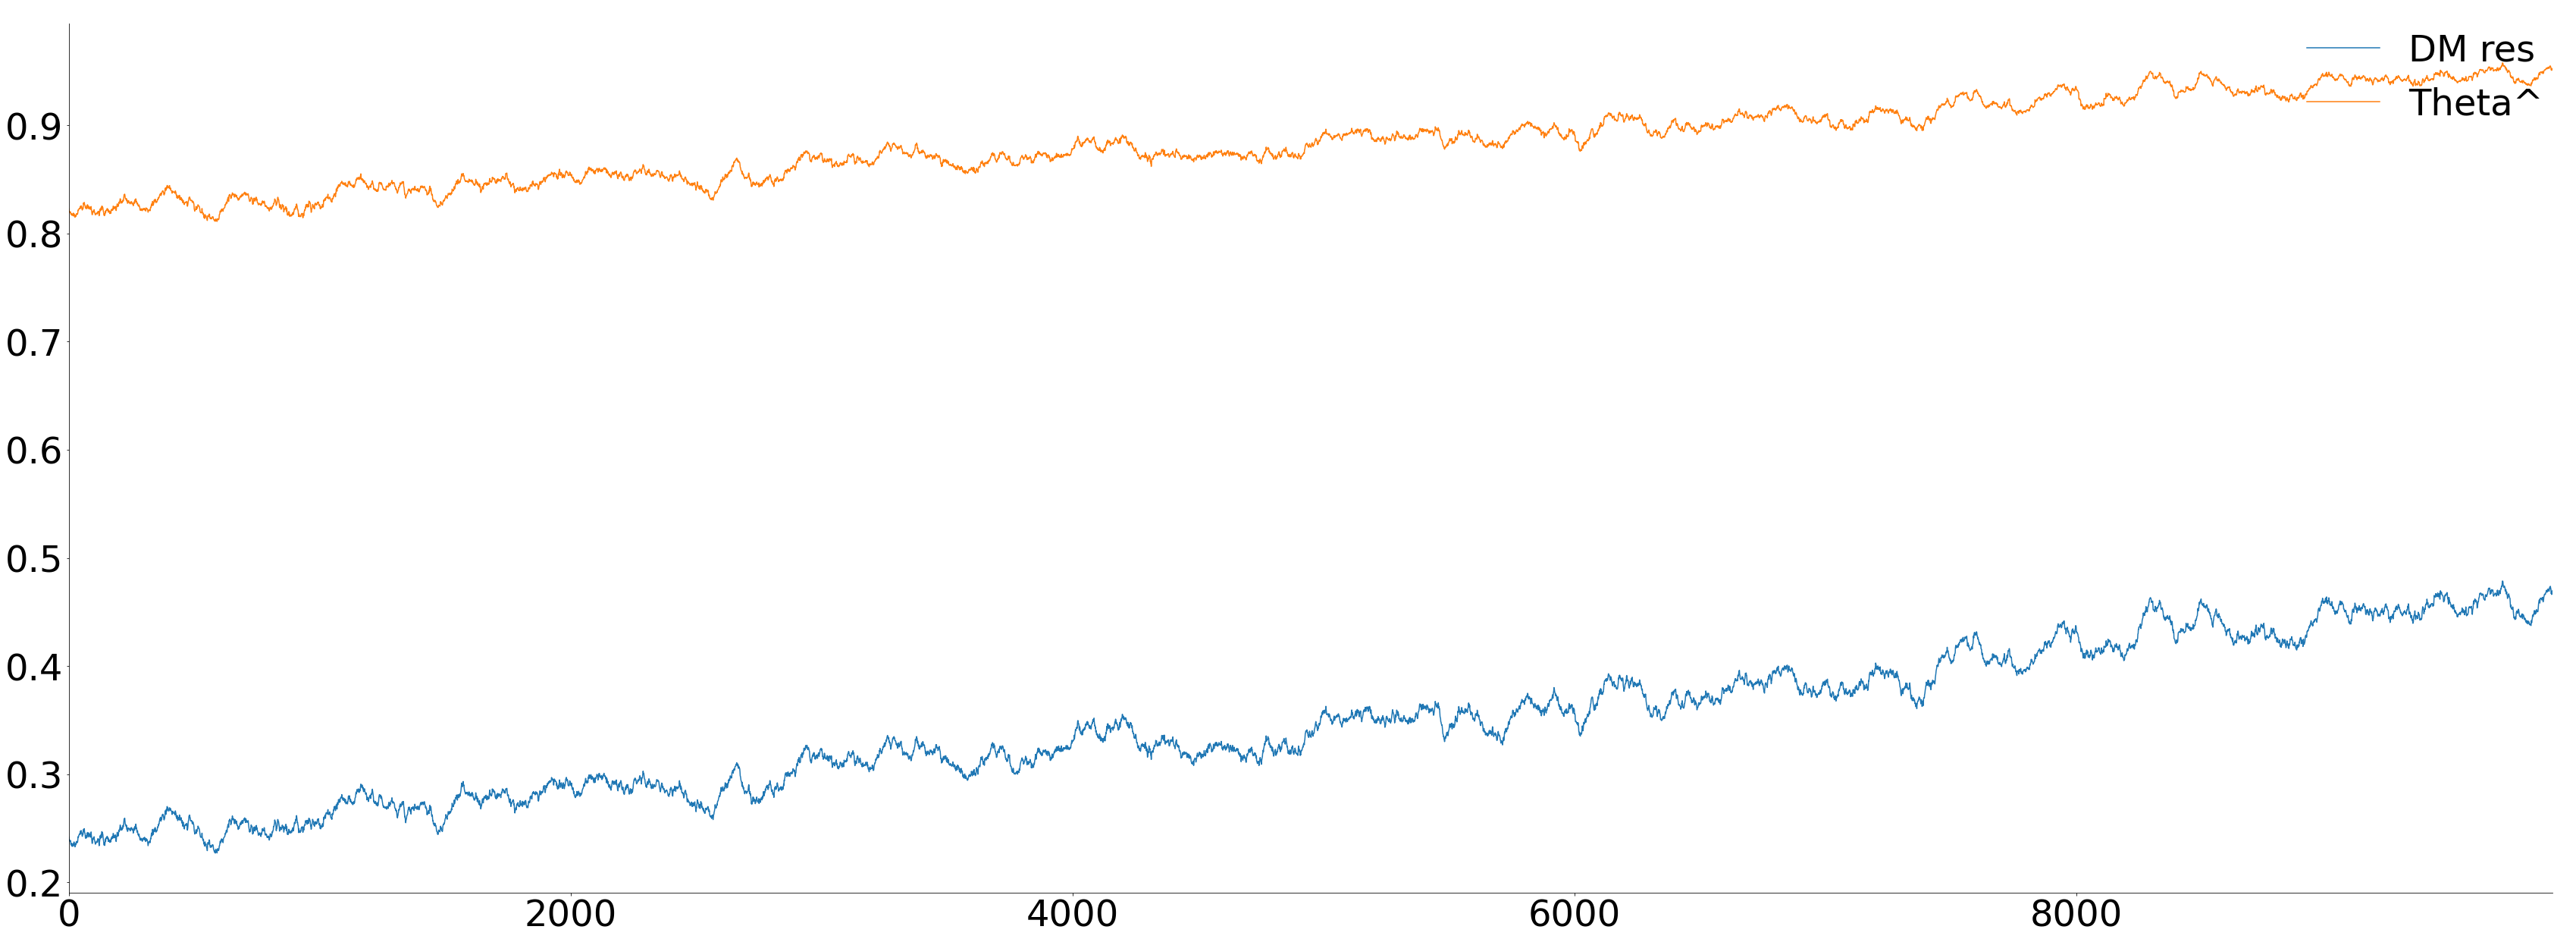

In [1349]:
plot(probit_plot)

QUESTION 2
-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------

In [138]:
# Simulate some data
# run time ~ 1 minute

# True simulated data ## Sample size 100
rg = np.random.RandomState(100)

r = [0.90, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]
runs = 1000
size = 100
nw = size ** (1/3)
cv = norm.ppf(0.975)
theta_100_2 = []
dm_100_2 = []
count_100 = 0

for rho in r:
    print(rho)
    for run in range(runs):
        start = rg.normal(0,1/(1-(rho**2)))
        run_holder = []
        run_holder.append(start)

        for i in range(1,size):
            shock = rg.standard_normal()
            last_val = run_holder[-1]
            new_val = last_val * rho + shock
            run_holder.append(new_val)
            
        y = np.asarray(run_holder)

        # Fit using first half, tau//2
        mod = AutoReg(y[:size//2], lags=1, trend="c", old_names=False)
        res = mod.fit()

        # Full-sample model
        oos_mod = AutoReg(y, lags=1, trend="c", old_names=False)

        # OOS Random Walk predictions
        oos_rw = oos_mod.predict([0, 1])

        ## ADF test, and forecasting
        adf = ADF(y[-size//2:]).pvalue

        if adf > 0.05:
            oos_1step = oos_rw
            count_100+=1
            
        else:
            oos_1step = oos_mod.predict(res.params)


        # Get second half of both
        # Use -size//2: to get second half
        oos_1step = oos_1step[-size//2:]
        oos_rw = oos_rw[-size//2:]

        # Calculate the losses
        loss_1step = (oos_1step - y[-size//2:]) ** 2
        loss_rw = (oos_rw - y[-size//2:]) ** 2

        evaluation = (loss_1step - loss_rw).sum()

        if evaluation > 0:
            mark = 1
        else:
            mark = 0

        # Append the estimated thetas and the DM results into lists
        theta_100_2.append(res.params[1])
        dm_100_2.append(mark)

theta_100_2 = np.asarray(theta_100_2)
dm_100_2 = np.asarray(dm_100_2)

#----------------------------------------------------------------------------------------------------------------------------
# Simulate some data
# run time ~ 1 minute

# True simulated data ## Sample size 250
rg = np.random.RandomState(100)


size = 250
nw = size ** (1/3)
cv = norm.ppf(0.975)
theta_250_2 = []
count_250 = 0
dm_250_2 = []

for rho in r:
    print(rho)
    for run in range(runs):
        start = rg.normal(0,1/(1-(rho**2)))
        run_holder = []
        run_holder.append(start)

        for i in range(1,size):
            shock = rg.standard_normal()
            last_val = run_holder[-1]
            new_val = last_val * rho + shock
            run_holder.append(new_val)
            
        y = np.asarray(run_holder)

        # Fit using first half, tau//2
        mod = AutoReg(y[:size//2], lags=1, trend="c", old_names=False)
        res = mod.fit()

        # Full-sample model
        oos_mod = AutoReg(y, lags=1, trend="c", old_names=False)

        # OOS Random Walk predictions
        oos_rw = oos_mod.predict([0, 1])

        ## ADF test, and forecasting
        adf = ADF(y[-size//2:]).pvalue

        if adf > 0.05:
            oos_1step = oos_rw
            count_250+=1
            
        else:
            oos_1step = oos_mod.predict(res.params)


        # Get second half of both
        # Use -size//2: to get second half
        oos_1step = oos_1step[-size//2:]
        oos_rw = oos_rw[-size//2:]

        # Calculate the losses
        loss_1step = (oos_1step - y[-size//2:]) ** 2
        loss_rw = (oos_rw - y[-size//2:]) ** 2

        evaluation = (loss_1step - loss_rw).sum()

        if evaluation > 0:
            mark = 1
        else:
            mark = 0

        # Append the estimated thetas and the DM results into lists
        theta_250_2.append(res.params[1])
        dm_250_2.append(mark)

theta_250_2 = np.asarray(theta_250_2)
dm_250_2 = np.asarray(dm_250_2)


#----------------------------------------------------------------------------------------------------------------------------
# Simulate some data
# run time ~ 1 minute

# True simulated data ## Sample size 500
count_500 = 0
rg = np.random.RandomState(100)


size = 500
nw = size ** (1/3)
cv = norm.ppf(0.975)
theta_500_2 = []
dm_500_2 = []

for rho in r:
    print(rho)
    for run in range(runs):
        start = rg.normal(0,1/(1-(rho**2)))
        run_holder = []
        run_holder.append(start)

        for i in range(1,size):
            shock = rg.standard_normal()
            last_val = run_holder[-1]
            new_val = last_val * rho + shock
            run_holder.append(new_val)
            
        y = np.asarray(run_holder)

        # Fit using first half, tau//2
        mod = AutoReg(y[:size//2], lags=1, trend="c", old_names=False)
        res = mod.fit()

        # Full-sample model
        oos_mod = AutoReg(y, lags=1, trend="c", old_names=False)

        # OOS Random Walk predictions
        oos_rw = oos_mod.predict([0, 1])

        ## ADF test, and forecasting
        adf = ADF(y[-size//2:]).pvalue

        if adf > 0.05:
            oos_1step = oos_rw
            count_500 +=1
            
        else:
            oos_1step = oos_mod.predict(res.params)


        # Get second half of both
        # Use -size//2: to get second half
        oos_1step = oos_1step[-size//2:]
        oos_rw = oos_rw[-size//2:]

        # Calculate the losses
        loss_1step = (oos_1step - y[-size//2:]) ** 2
        loss_rw = (oos_rw - y[-size//2:]) ** 2

        evaluation = (loss_1step - loss_rw).sum()

        if evaluation > 0:
            mark = 1
        else:
            mark = 0

        # Append the estimated thetas and the DM results into lists
        theta_500_2.append(res.params[1])
        dm_500_2.append(mark)

theta_500_2 = np.asarray(theta_500_2)
dm_500_2 = np.asarray(dm_500_2)


0.9
0.91
0.92
0.93
0.94
0.95
0.96
0.97
0.98
0.99
0.9
0.91
0.92
0.93
0.94
0.95
0.96
0.97
0.98
0.99
0.9
0.91
0.92
0.93
0.94
0.95
0.96
0.97
0.98
0.99


In [139]:
print("Sample size = 100")
print("% of runs where the forecast is beaten by a random walk (where a rw has not been preselected")
print(f" {np.mean(dm_100_2) * 100}%")
print()
print("Compared to previously:")
print(f"{np.round(np.mean(dm_100)*100,3)}%")
print()
print(f"{count_100/10000}")
print("Huge Improvement")

Sample size = 100
% of runs where the forecast is beaten by a random walk (where a rw has not been preselected
 5.56%

Compared to previously:
53.282%

0.8651
Huge Improvement


In [140]:
print("Sample size = 250")
print("% of runs where the forecast is beaten by a random walk (where a rw has not been preselected")
print(f" {np.mean(dm_250_2) * 100}%")
print()
print("Compared to previously:")
print(f"{np.round(np.mean(dm_250)*100,3)}%")
print()
print(f"{count_250/10000}")
print("Huge Improvement")

Sample size = 250
% of runs where the forecast is beaten by a random walk (where a rw has not been preselected
 4.22%

Compared to previously:
36.101%

0.7559
Huge Improvement


In [141]:
print("Sample size = 500")
print("% of runs where the forecast is beaten by a random walk (where a rw has not been preselected")
print(f" {np.mean(dm_500_2) * 100}%")
print()
print("Compared to previously:")
print(f"{np.round(np.mean(dm_500)*100,3)}%")
print()
print(f"{count_500/10000}")
print("Huge Improvement")

Sample size = 500
% of runs where the forecast is beaten by a random walk (where a rw has not been preselected
 5.06%

Compared to previously:
22.451%

0.4705
Huge Improvement


In [399]:
# averaging realised fail rates
app_dist_100_2 = pd.DataFrame([theta_100_2,dm_100_2]).T
app_dist_100_2.columns = ["Theta^", "DM res"]
app_dist_100_2 = app_dist_100_2.sort_values("Theta^")

sampled_theta = []
sampled_dm = []
spacing = 100


# two number multiply to give total runs * rho
for i in range(10000):

    start = i - spacing
    end = i + spacing
    sampled_theta.append(app_dist_100_2["Theta^"][start:end].mean())
    sampled_dm.append(app_dist_100_2["DM res"][start:end].mean())

sampled_theta = np.asarray(sampled_theta)
sampled_dm = np.asarray(sampled_dm)

app_dist_100_2 = pd.DataFrame([sampled_theta,sampled_dm]).T
app_dist_100_2.columns = ["Theta^", "DM res"]
app_dist_100_2 = app_dist_100_2.dropna()

#-----------------------------------------------------------------------------------------------------------

# averaging realised fail rates: 250
app_dist_250_2 = pd.DataFrame([theta_250_2,dm_250_2]).T
app_dist_250_2.columns = ["Theta^", "DM res"]
app_dist_250_2 = app_dist_250_2.sort_values("Theta^")

sampled_theta = []
sampled_dm = []

# two number multiply to give total runs * rho
for i in range(10000):

    start = i - spacing
    end = i + spacing
    sampled_theta.append(app_dist_250_2["Theta^"][start:end].mean())
    sampled_dm.append(app_dist_250_2["DM res"][start:end].mean())

sampled_theta = np.asarray(sampled_theta)
sampled_dm = np.asarray(sampled_dm)

app_dist_250_2 = pd.DataFrame([sampled_theta,sampled_dm]).T
app_dist_250_2.columns = ["Theta^", "DM res"]
app_dist_250_2 = app_dist_250_2.dropna()

#-----------------------------------------------------------------------------------------------------------

# averaging realised fail rates: 500
app_dist_500_2 = pd.DataFrame([theta_500_2,dm_500_2]).T
app_dist_500_2.columns = ["Theta^", "DM res"]
app_dist_500_2 = app_dist_500_2.sort_values("Theta^")

sampled_theta = []
sampled_dm = []


# two number multiply to give total runs * rho
for i in range(10000):

    start = i - spacing
    end = i + spacing
    sampled_theta.append(app_dist_500_2["Theta^"][start:end].mean())
    sampled_dm.append(app_dist_500_2["DM res"][start:end].mean())

sampled_theta = np.asarray(sampled_theta)
sampled_dm = np.asarray(sampled_dm)

app_dist_500_2 = pd.DataFrame([sampled_theta,sampled_dm]).T
app_dist_500_2.columns = ["Theta^", "DM res"]
app_dist_500_2 = app_dist_500_2.dropna()

In [ ]:
combined_dframe_3 = pd.DataFrame([app_dist_100_2["DM res"],app_dist_250_2["DM res"], app_dist_500_2["DM res"],app_dist_250_2["Theta^"]]).T
combined_dframe_3.columns = ["Failure rate, size = 100","Failure rate, size = 250","Failure rate, size = 500","Theta^"]
combined_dframe_3.index = combined_dframe_3["Theta^"]
combined_dframe_3 =  combined_dframe_3.drop("Theta^",axis=1)

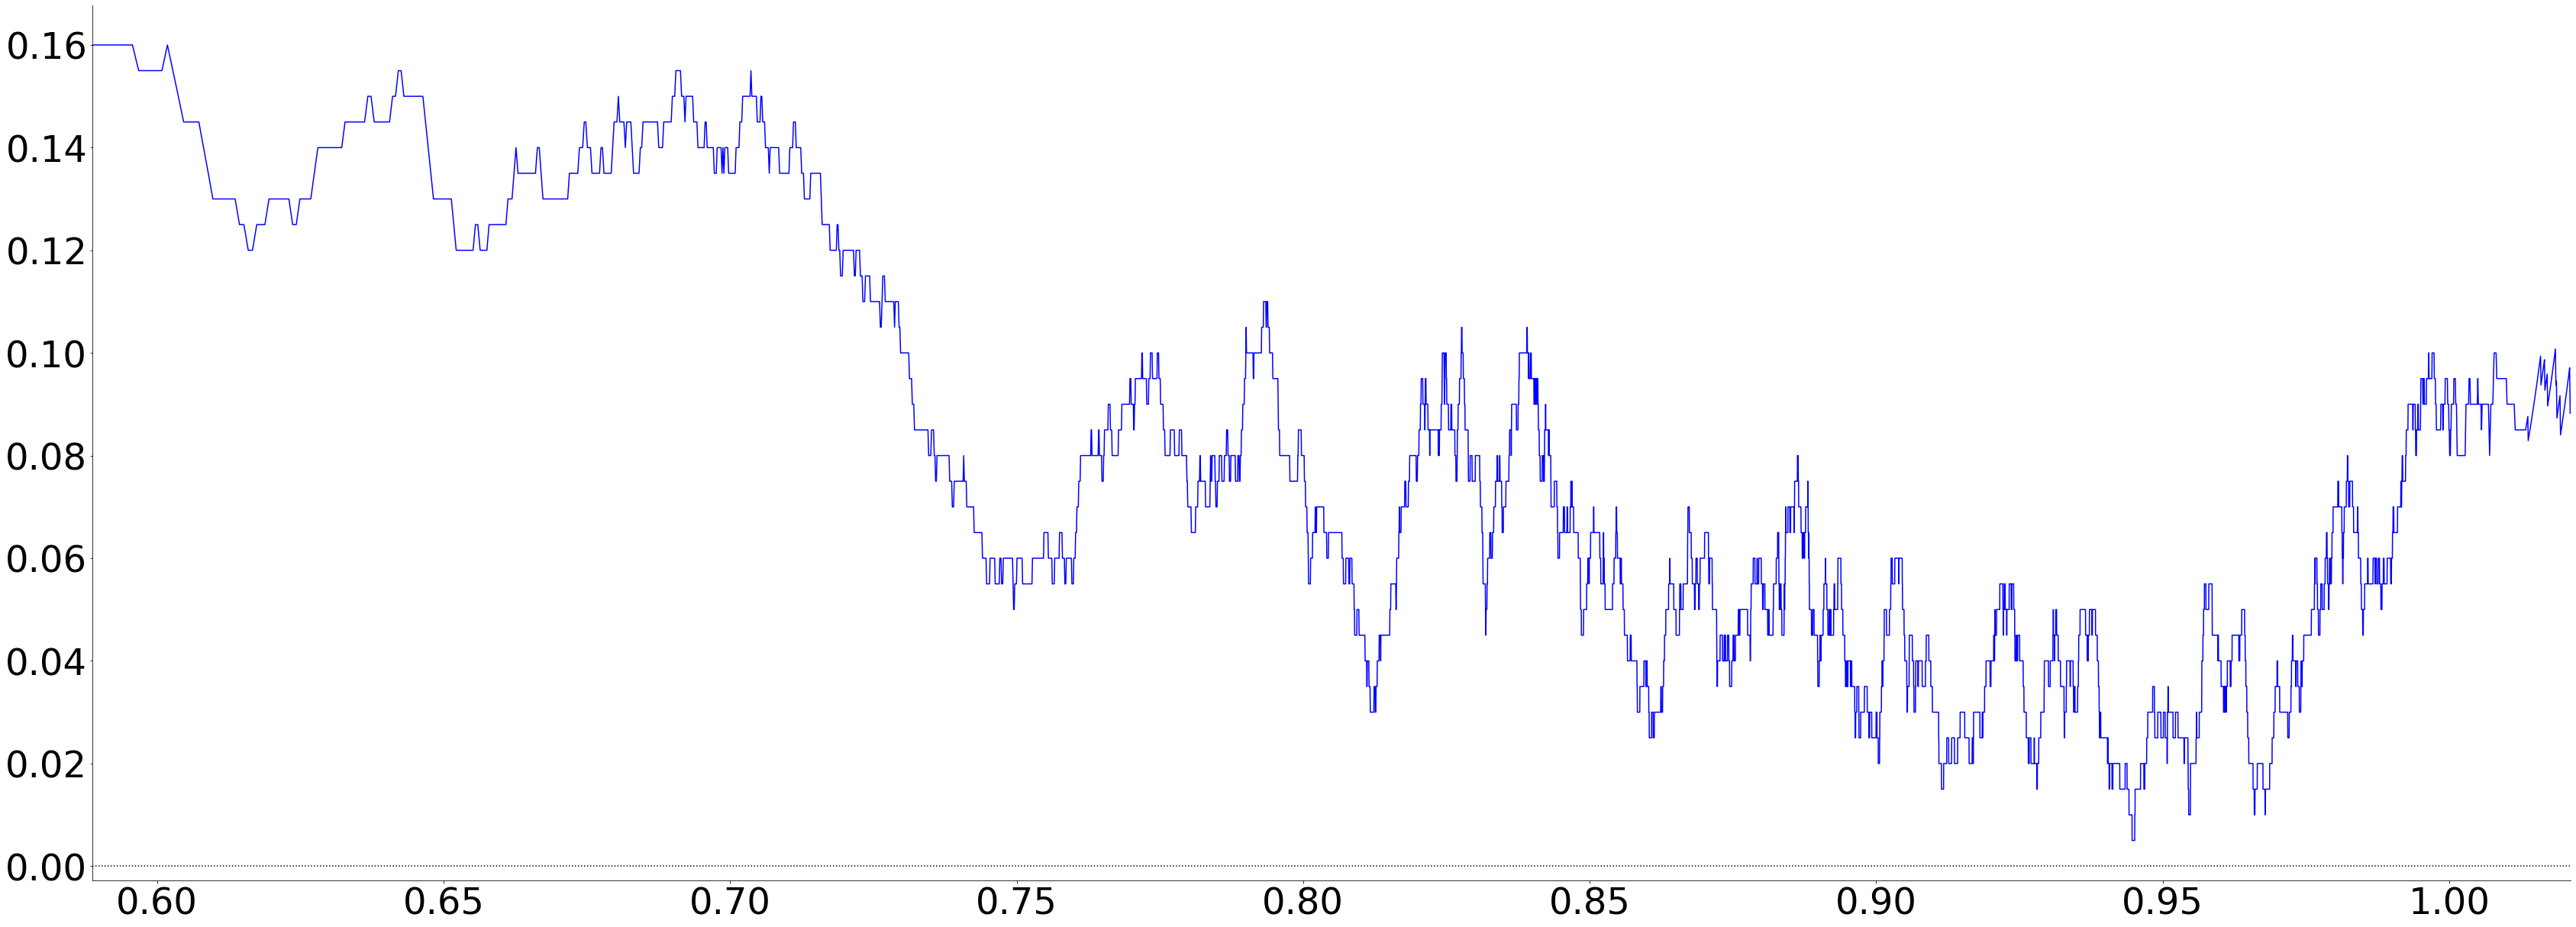

In [396]:
# Full Plot - see the issue of extreme underestimation in half the sample when showing full sample : hence restrict between 0.9 and 1.03 # 100
app_dist_100_2.index =app_dist_100_2["Theta^"]
plot_shrinkage(app_dist_100_2["DM res"])

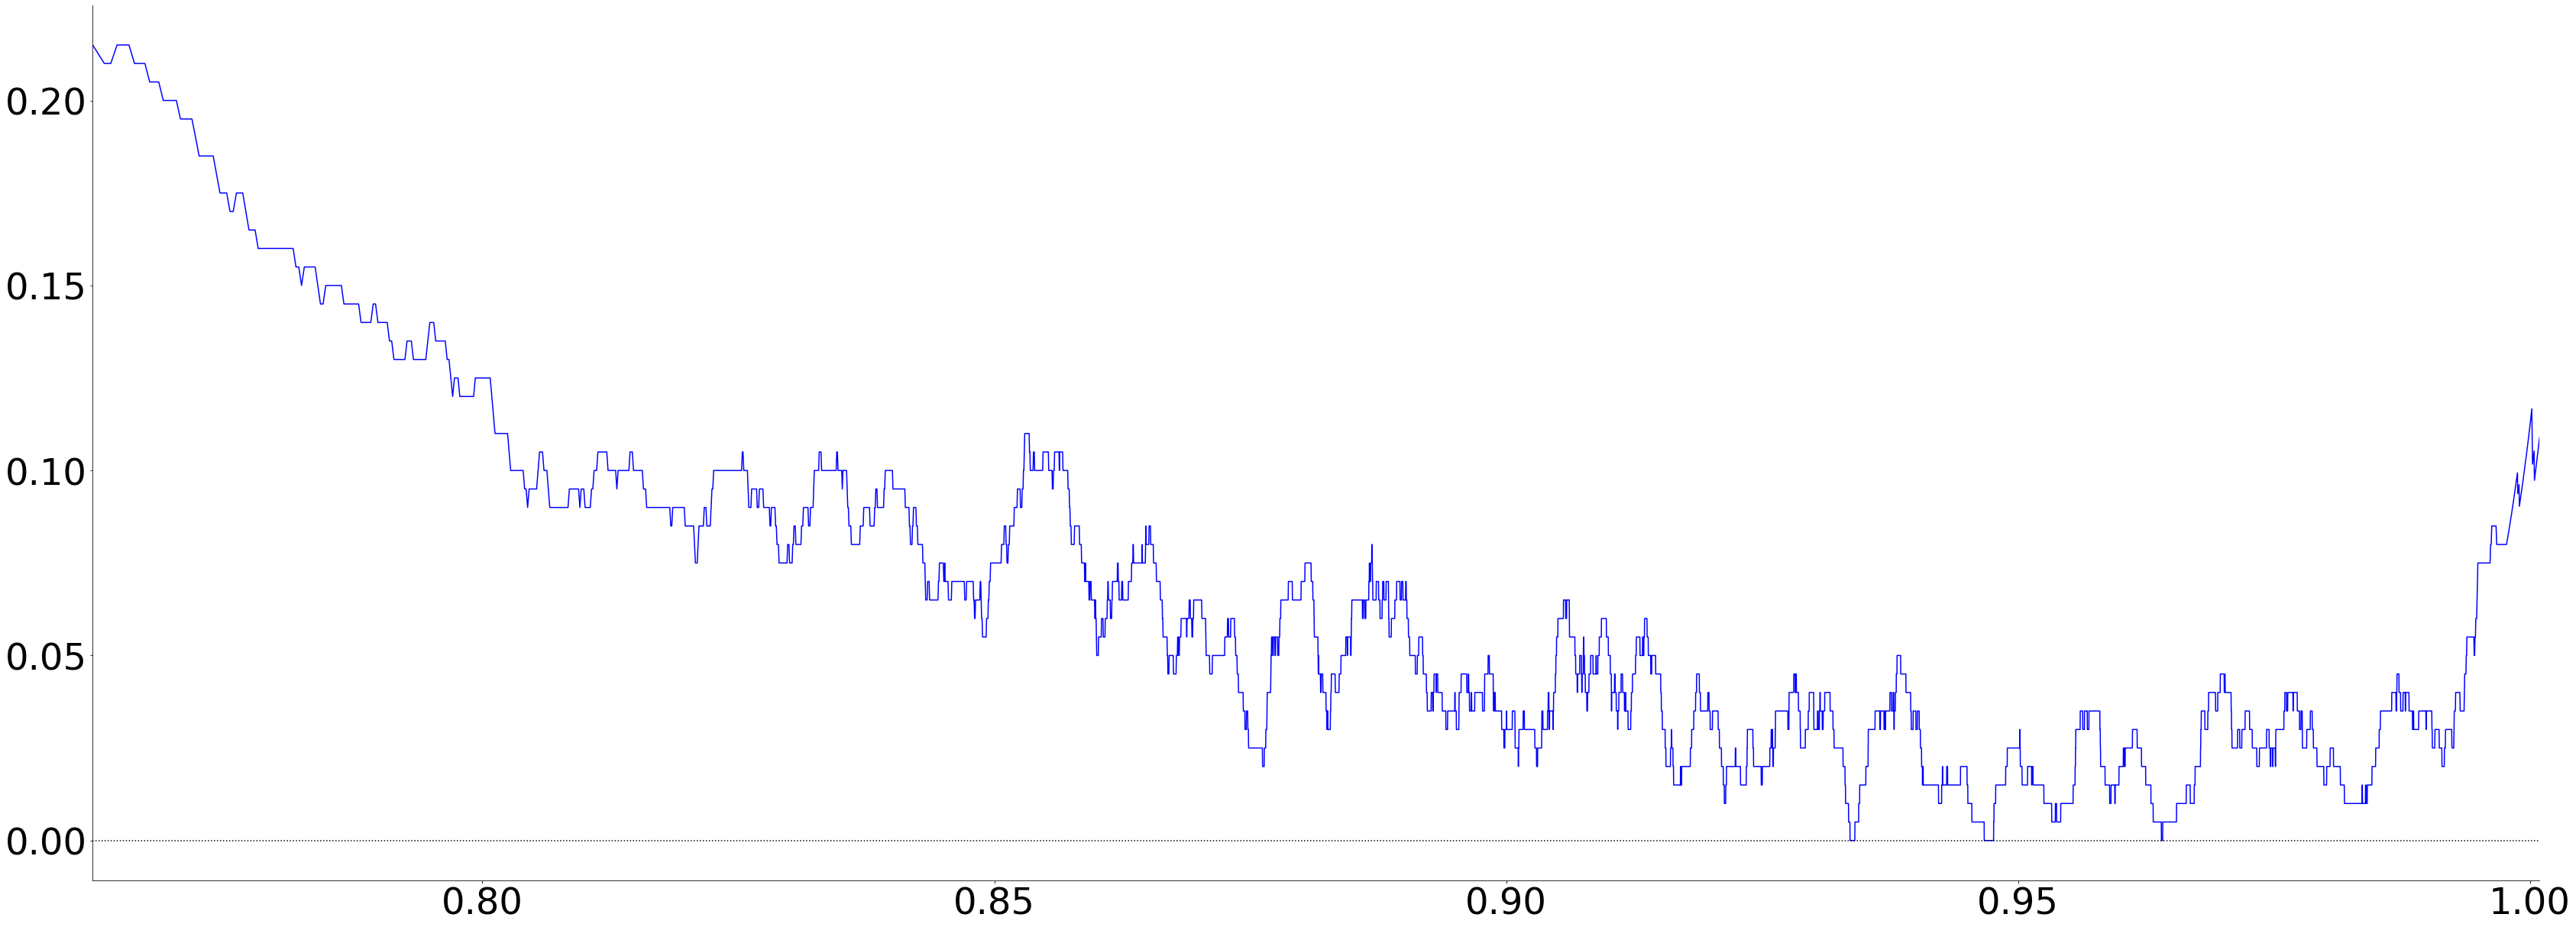

In [397]:
# Full Plot - see the issue of extreme underestimation in half the sample when showing full sample : hence restrict between 0.9 and 1.03 # 100
app_dist_250_2.index =app_dist_250_2["Theta^"]
plot_shrinkage(app_dist_250_2["DM res"])

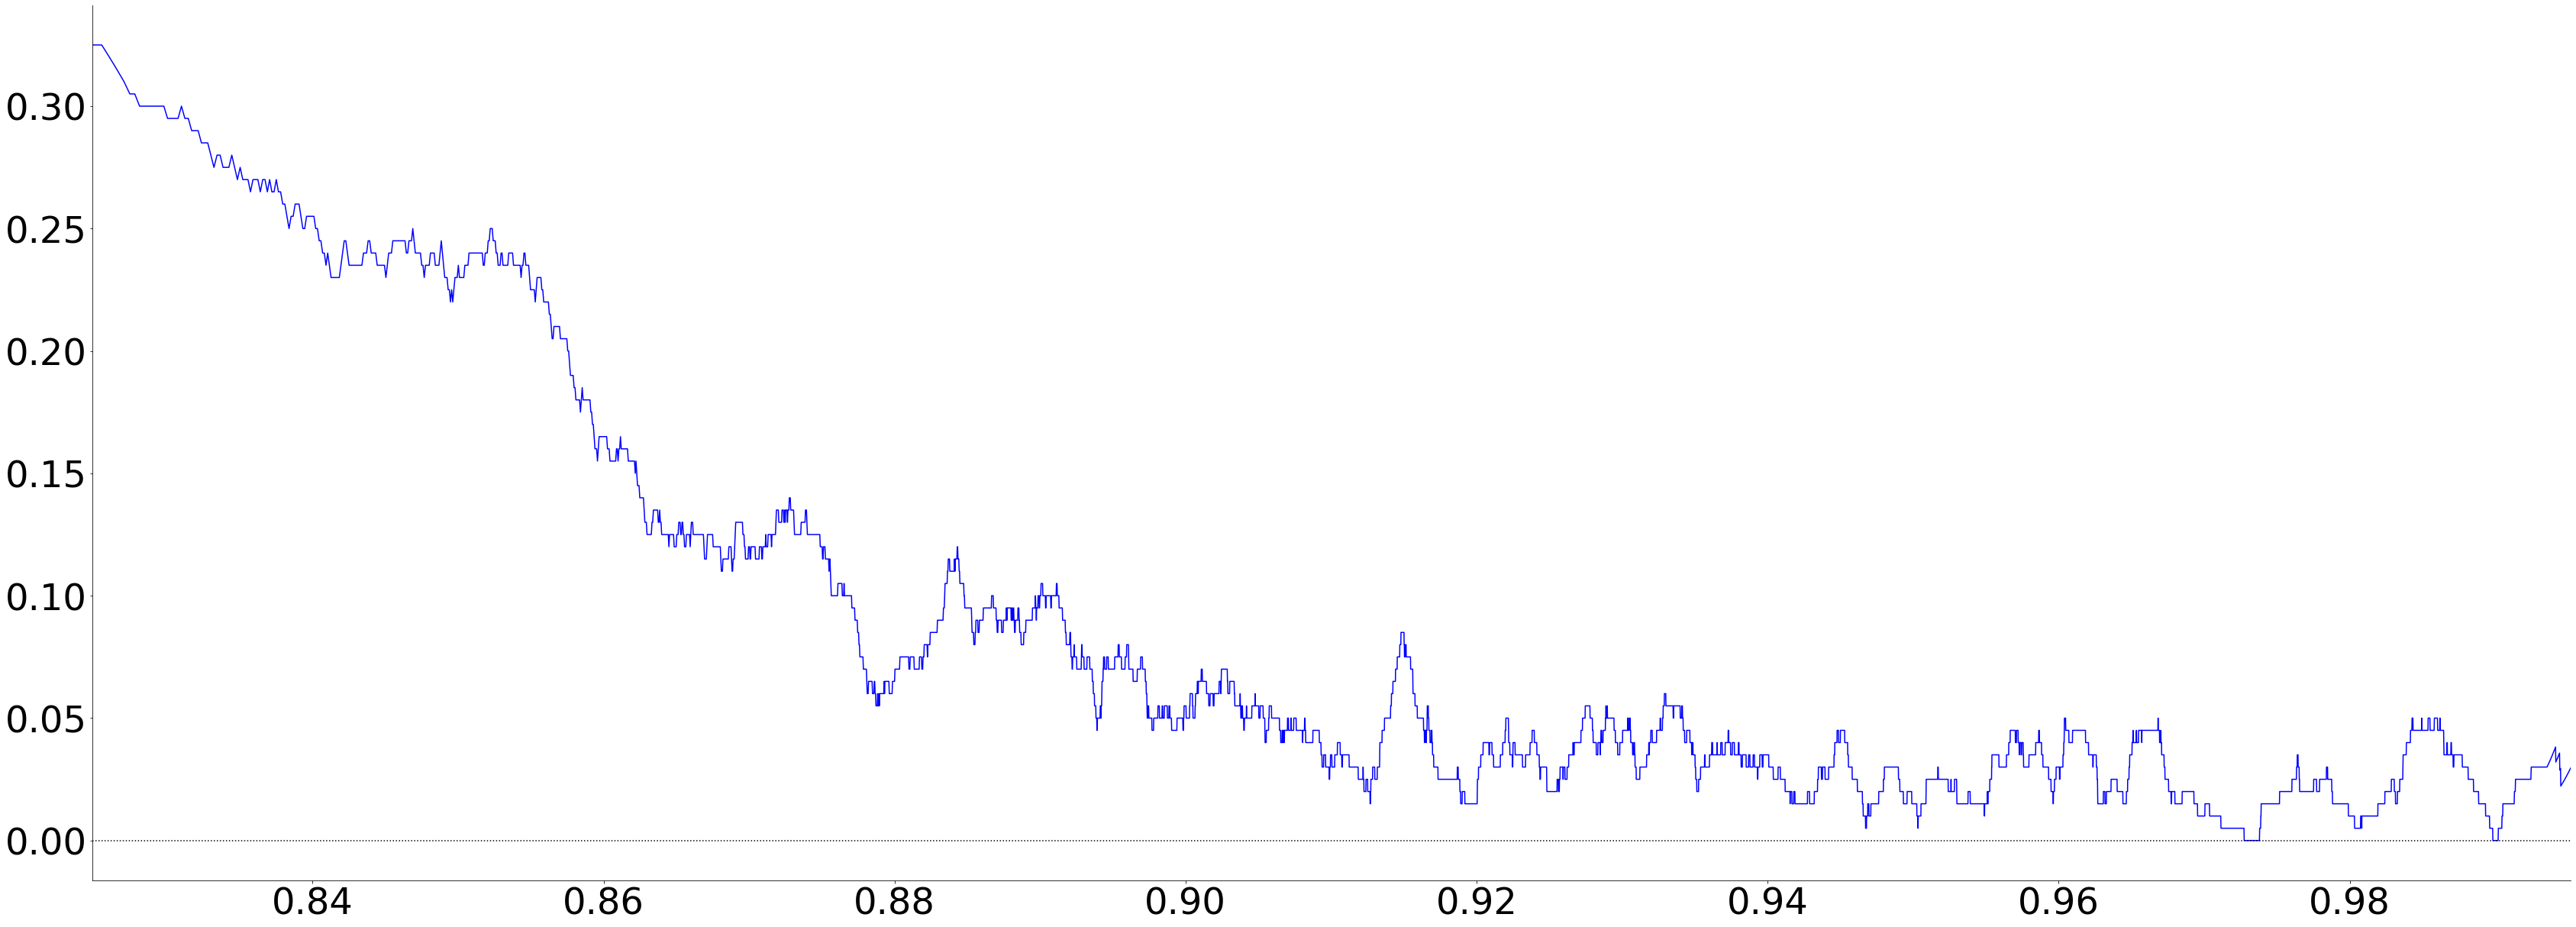

In [398]:
# Full Plot - see the issue of extreme underestimation in half the sample when showing full sample : hence restrict between 0.9 and 1.03 # 100
app_dist_500_2.index =app_dist_500_2["Theta^"]
plot_shrinkage(app_dist_500_2["DM res"])

Question 3
---

In [88]:

# estimate the difference and apply LASSO
from sklearn.linear_model import LassoCV, RidgeCV
def lasso_reg(x,y):

    x_scale = x.std(ddof=0)[0]
    y_scale = y.std(ddof=0)
    std_x = x / x_scale
    std_y = y / y_scale
    std_x = std_x

    lasso_cv = LassoCV(fit_intercept=True)
    lasso_cv = lasso_cv.fit(std_x,std_y)
    #print(f"Optimal Alpha = {lasso_cv.alpha_}")
    lasso_beta = lasso_cv.coef_[1]  * (y_scale / x_scale)
    lasso_intercept = lasso_cv.intercept_ * (y_scale / x_scale)
    alpha = lasso_cv.alpha_
    return lasso_intercept, lasso_beta, alpha


In [157]:
""" Second Method"""

# True simulated data ## Sample size 100
rg = np.random.RandomState(100)

r = [0.90, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]
runs = 1000
size = 100
nw = size ** (1/3)
cv = norm.ppf(0.95)
theta_100_3 = []
dm_100_3 = []
est_rho_100 = []
alpha_100 = []

for rho in r:
    print(rho)

    for run in range(runs):
        start = rg.normal(0,1/(1-(rho**2)))
        run_holder = []
        run_holder.append(start)

        for i in range(1,size):
            shock = rg.standard_normal()
            last_val = run_holder[-1]
            new_val = last_val * rho + shock
            run_holder.append(new_val)
            
        y = pd.Series(run_holder)
        y_diff = y.diff()

        # Fit using first half, size//2
        x = sm.add_constant(y.shift(1).dropna()[:size//2])
        dep = y_diff[1:].dropna()[:size//2]

        a, b, alpha = lasso_reg(x,dep)

        #res = sm.OLS(dep,x).fit()
        #a, b = res.params

        mod = AutoReg(y[:(size//2)], lags=1, trend="c", old_names=False)
        theta = mod.fit().params[1]
        #res = mod.fit()

        # Full-sample model
        oos_mod = AutoReg(y, lags=1, trend="c", old_names=False)

        # OOS Random Walk predictions
        oos_rw = oos_mod.predict([0, 1])

        # Model forecasts
        #oos_1step = oos_mod.predict(res.params)
        #oos_1step = res.params * y_diff

        est = []
        for i in range(1,100):
            a = a
            t_1 = y[i-1]
            e = a + t_1 * (b) + t_1
            est.append(e)
        oos_1step = np.asarray(est)


        # Get second half of both
        # Use -size//2: to get second half
        oos_1step = oos_1step[-(size//2):]
        oos_rw = oos_rw[-size//2:]

        # Calculate the losses
        loss_1step = (oos_1step - y[-size//2:]) ** 2
        loss_rw = (oos_rw - y[-size//2:]) ** 2

        evaluation = (loss_1step - loss_rw).sum()

        if evaluation > 0:
            mark = 1
        else:
            mark = 0

        # Append the estimated thetas and the DM results into lists
        alpha_100.append(alpha)
        theta_100_3.append(theta)
        est_rho_100.append(b)
        dm_100_3.append(mark)

theta_100_3 = np.asarray(theta_100_3)
dm_100_3 = np.asarray(dm_100_3)
alpha_100 = np.asarray(alpha_100)

#------------------------------------------------------------------------------------------------------------------------------------------
# True simulated data ## Sample size 250
rg = np.random.RandomState(100)


size = 250
nw = size ** (1/3)
cv = norm.ppf(0.95)
theta_250_3 = []
dm_250_3 = []
est_rho_250 = []
alpha_250 = []

for rho in r:
    print(rho)

    for run in range(runs):
        start = rg.normal(0,1/(1-(rho**2)))
        run_holder = []
        run_holder.append(start)

        for i in range(1,size):
            shock = rg.standard_normal()
            last_val = run_holder[-1]
            new_val = last_val * rho + shock
            run_holder.append(new_val)
            
        y = pd.Series(run_holder)
        y_diff = y.diff()

        # Fit using first half, size//2
        x = sm.add_constant(y.shift(1).dropna()[:size//2])
        dep = y_diff[1:].dropna()[:size//2]

        a, b, alpha = lasso_reg(x,dep)

        #res = sm.OLS(dep,x).fit()
        #a, b = res.params

        mod = AutoReg(y[:(size//2)], lags=1, trend="c", old_names=False)
        theta = mod.fit().params[1]
        #res = mod.fit()

        # Full-sample model
        oos_mod = AutoReg(y, lags=1, trend="c", old_names=False)

        # OOS Random Walk predictions
        oos_rw = oos_mod.predict([0, 1])

        # Model forecasts
        #oos_1step = oos_mod.predict(res.params)
        #oos_1step = res.params * y_diff

        est = []
        for i in range(1,size):
            a = a
            t_1 = y[i-1]
            e = a + t_1 * (b) + t_1
            est.append(e)
        oos_1step = np.asarray(est)


        # Get second half of both
        # Use -size//2: to get second half
        oos_1step = oos_1step[-(size//2):]
        oos_rw = oos_rw[-size//2:]

        # Calculate the losses
        loss_1step = (oos_1step - y[-size//2:]) ** 2
        loss_rw = (oos_rw - y[-size//2:]) ** 2

        evaluation = (loss_1step - loss_rw).sum()

        if evaluation > 0:
            mark = 1
        else:
            mark = 0

        # Append the estimated thetas and the DM results into lists
        alpha_250.append(alpha)
        theta_250_3.append(theta)
        est_rho_250.append(b)
        dm_250_3.append(mark)

theta_250_3 = np.asarray(theta_250_3)
dm_250_3 = np.asarray(dm_250_3)
alpha_250 = np.asarray(alpha_250)


#------------------------------------------------------------------------------------------------------------------------------------------
# True simulated data ## Sample size 500
rg = np.random.RandomState(100)


size = 500
nw = size ** (1/3)
cv = norm.ppf(0.95)
theta_500_3 = []
dm_500_3 = []
est_rho_500 = []
alpha_500 = []

for rho in r:
    print(rho)

    for run in range(runs):
        start = rg.normal(0,1/(1-(rho**2)))
        run_holder = []
        run_holder.append(start)

        for i in range(1,size):
            shock = rg.standard_normal()
            last_val = run_holder[-1]
            new_val = last_val * rho + shock
            run_holder.append(new_val)
            
        y = pd.Series(run_holder)
        y_diff = y.diff()

        # Fit using first half, size//2
        x = sm.add_constant(y.shift(1).dropna()[:size//2])
        dep = y_diff[1:].dropna()[:size//2]

        a, b, alpha = lasso_reg(x,dep)

        #res = sm.OLS(dep,x).fit()
        #a, b = res.params

        mod = AutoReg(y[:(size//2)], lags=1, trend="c", old_names=False)
        theta = mod.fit().params[1]
        #res = mod.fit()

        # Full-sample model
        oos_mod = AutoReg(y, lags=1, trend="c", old_names=False)

        # OOS Random Walk predictions
        oos_rw = oos_mod.predict([0, 1])

        # Model forecasts
        #oos_1step = oos_mod.predict(res.params)
        #oos_1step = res.params * y_diff

        est = []
        for i in range(1,size):
            a = a
            t_1 = y[i-1]
            e = a + t_1 * (b) + t_1
            est.append(e)
        oos_1step = np.asarray(est)


        # Get second half of both
        # Use -size//2: to get second half
        oos_1step = oos_1step[-(size//2):]
        oos_rw = oos_rw[-size//2:]

        # Calculate the losses
        loss_1step = (oos_1step - y[-size//2:]) ** 2
        loss_rw = (oos_rw - y[-size//2:]) ** 2

        evaluation = (loss_1step - loss_rw).sum()

        if evaluation > 0:
            mark = 1
        else:
            mark = 0

        # Append the estimated thetas and the DM results into lists
        alpha_500.append(alpha)
        theta_500_3.append(theta)
        est_rho_500.append(b)
        dm_500_3.append(mark)

theta_500_3 = np.asarray(theta_500_3)
dm_500_3 = np.asarray(dm_500_3)
alpha_500 = np.asarray(alpha_500)

0.9
0.91
0.92
0.93
0.94
0.95
0.96
0.97
0.98
0.99
0.9
0.91
0.92
0.93
0.94
0.95
0.96
0.97
0.98
0.99
0.9
0.91
0.92
0.93
0.94
0.95
0.96
0.97
0.98
0.99


In [158]:
diff_100 = ((np.asarray(est_rho_100) + 1) - theta_100_3)
diff_250 = ((np.asarray(est_rho_250) + 1) - theta_250_3)
diff_500 = ((np.asarray(est_rho_500) + 1) - theta_500_3)

In [289]:
### AVERAGING OPTIMAL SHRINKAGE

app_dist_100_3 = pd.DataFrame([theta_100_2,diff_100]).T
app_dist_100_3.columns = ["Theta^", "Optimal Shrinkage"]
app_dist_100_3 = app_dist_100_3.sort_values("Theta^")

sampled_theta = []
sampled_dm = []
spacing = 100


# two number multiply to give total runs * rho
for i in range(10000):

    start = i - spacing
    end = i + spacing
    sampled_theta.append(app_dist_100_3["Theta^"][start:end].mean())
    sampled_dm.append(app_dist_100_3["Optimal Shrinkage"][start:end].mean())

sampled_theta = np.asarray(sampled_theta)
sampled_dm = np.asarray(sampled_dm)

app_dist_100_3 = pd.DataFrame([sampled_theta,sampled_dm]).T
app_dist_100_3.columns = ["Theta^", "Optimal Shrinkage"]
app_dist_100_3 = app_dist_100_3.dropna()

#-----------------------------------------------------------------------------------------------------------

# averaging realised fail rates: 250
app_dist_250_3 = pd.DataFrame([theta_250_3,diff_250]).T
app_dist_250_3.columns = ["Theta^", "Optimal Shrinkage"]
app_dist_250_3 = app_dist_250_3.sort_values("Theta^")

sampled_theta = []
sampled_dm = []

# two number multiply to give total runs * rho
for i in range(10000):

    start = i - spacing
    end = i + spacing
    sampled_theta.append(app_dist_250_3["Theta^"][start:end].mean())
    sampled_dm.append(app_dist_250_3["Optimal Shrinkage"][start:end].mean())

sampled_theta = np.asarray(sampled_theta)
sampled_dm = np.asarray(sampled_dm)

app_dist_250_3 = pd.DataFrame([sampled_theta,sampled_dm]).T
app_dist_250_3.columns = ["Theta^", "Optimal Shrinkage"]
app_dist_250_3 = app_dist_250_3.dropna()

#-----------------------------------------------------------------------------------------------------------

# averaging realised fail rates: 500
app_dist_500_3 = pd.DataFrame([theta_500_3,diff_500]).T
app_dist_500_3.columns = ["Theta^", "Optimal Shrinkage"]
app_dist_500_3 = app_dist_500_3.sort_values("Theta^")

sampled_theta = []
sampled_dm = []


# two number multiply to give total runs * rho
for i in range(10000):

    start = i - spacing
    end = i + spacing
    sampled_theta.append(app_dist_500_3["Theta^"][start:end].mean())
    sampled_dm.append(app_dist_500_3["Optimal Shrinkage"][start:end].mean())

sampled_theta = np.asarray(sampled_theta)
sampled_dm = np.asarray(sampled_dm)

app_dist_500_3 = pd.DataFrame([sampled_theta,sampled_dm]).T
app_dist_500_3.columns = ["Theta^", "Optimal Shrinkage"]
app_dist_500_3 = app_dist_500_3.dropna()

In [295]:

DEFAULT_FIGSIZE = (48,18)
plt.rc("figure", figsize=DEFAULT_FIGSIZE)
plt.rc("font", size=48)

def plot_shrinkage(s, y=DEFAULT_FIGSIZE):
    #figsize(y=y)
    fig, ax = plt.subplots(1,1)
    if isinstance(s, pd.Series):
        s.plot(ax=ax, legend=False, color=["blue"])
    else:
        s.plot(ax=ax, legend=False)
        fig.legend(frameon=False)
    
    ax.set_xlabel(None)
    ax.set_xlim(s.index[0], s.index[-1]) #s.index[0]
    #ax.set_ylin(0,0.1)
    plt.axhline(0, 0,1,color="black",linestyle=":")

    
    sns.despine()
    fig.tight_layout(pad=1.0)
    #figsize()

In [328]:
combined_dframe = pd.DataFrame([app_dist_100_3["Optimal Shrinkage"],app_dist_250_3["Optimal Shrinkage"], app_dist_500_3["Optimal Shrinkage"],app_dist_100_3["Theta^"]]).T
combined_dframe.columns = ["Optimal Shrinkage, size = 100","Optimal Shrinkage, size = 250","Optimal Shrinkage, size = 500","Theta^"]
combined_dframe.index = combined_dframe["Theta^"]
combined_dframe =  combined_dframe.drop("Theta^",axis=1)

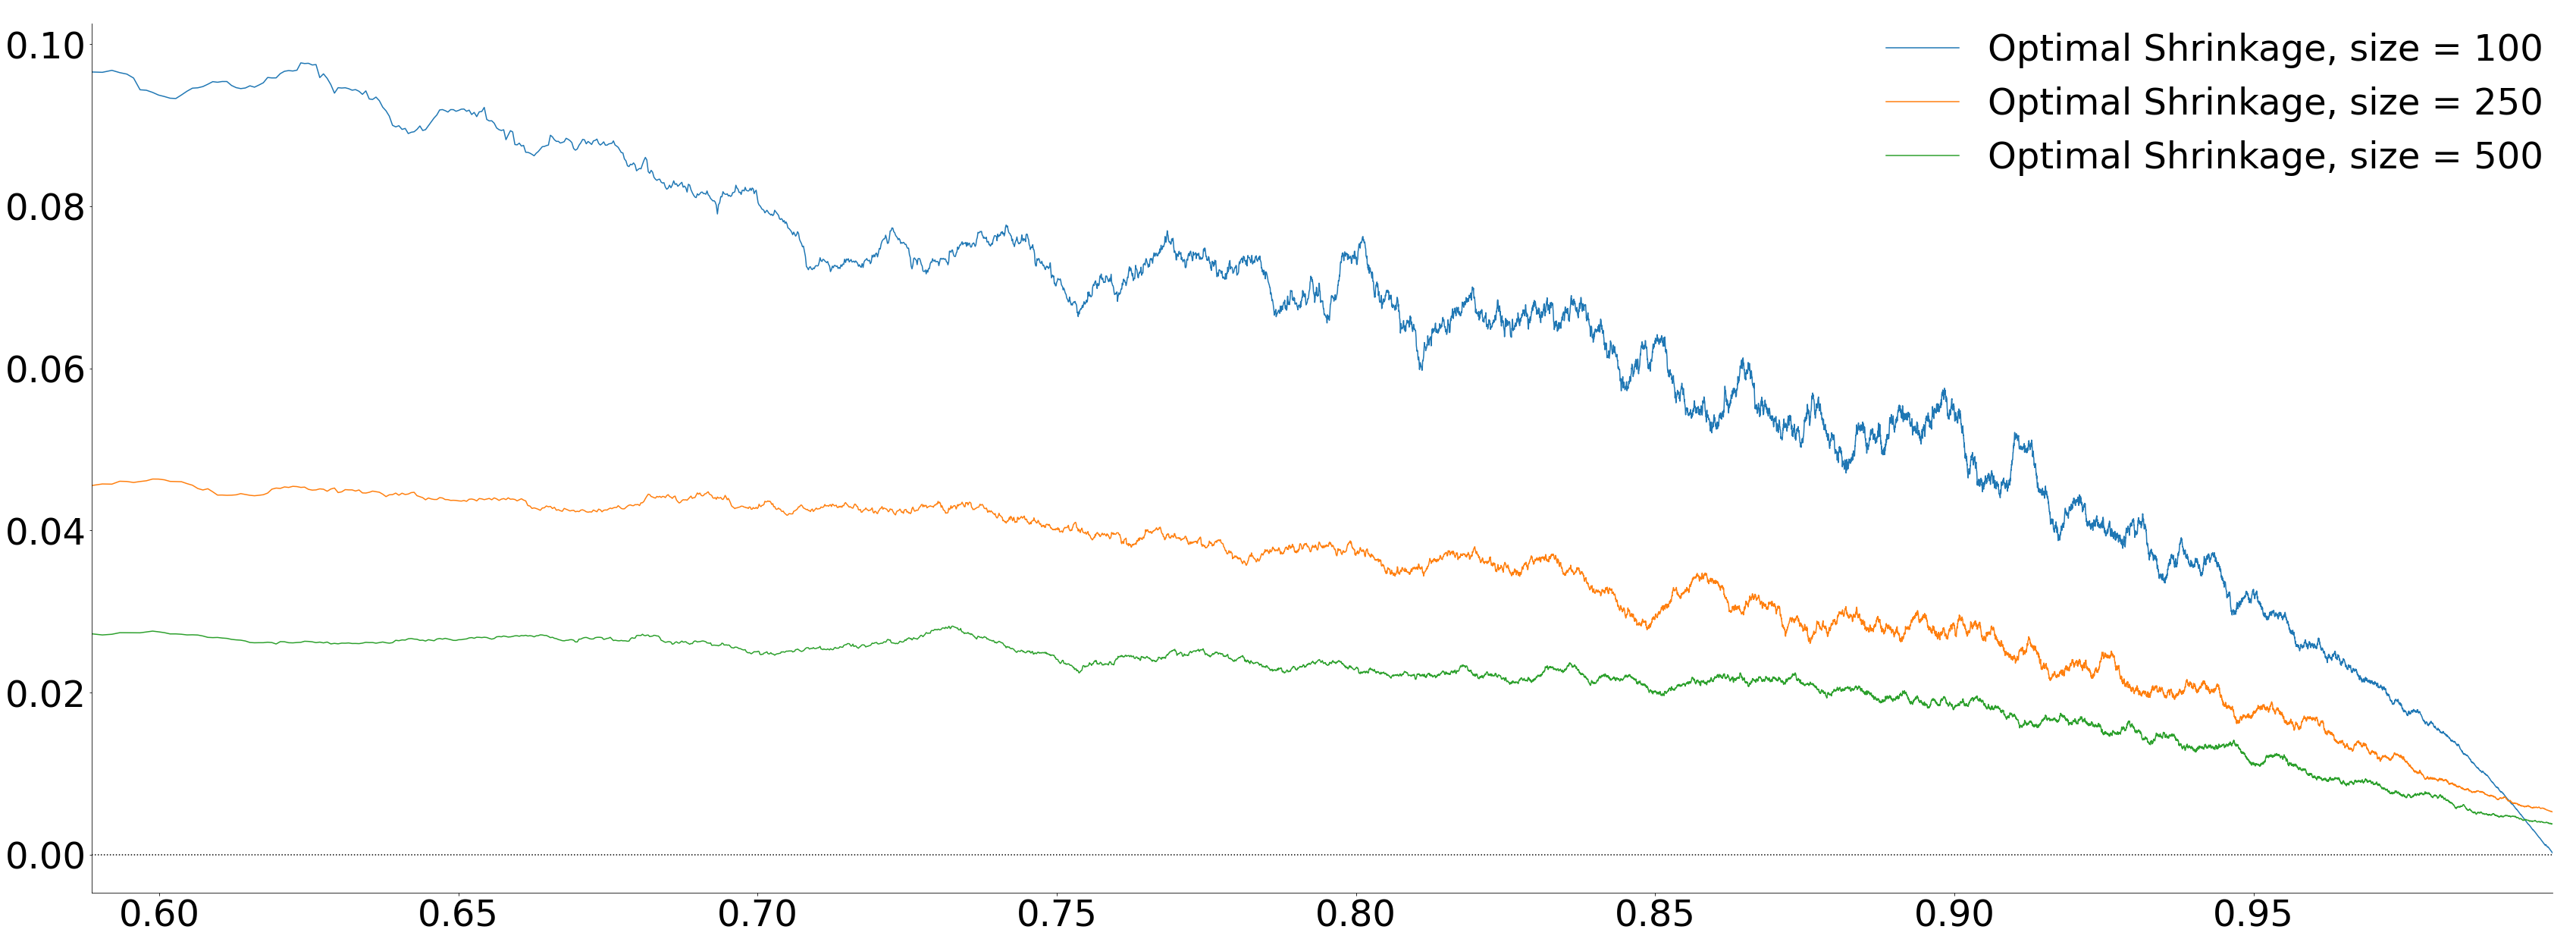

In [403]:
# Full Plot - see the issue of extreme underestimation in half the sample when showing full sample : hence restrict between 0.9 and 1.03 # 100

plot_shrinkage(combined_dframe[:1])

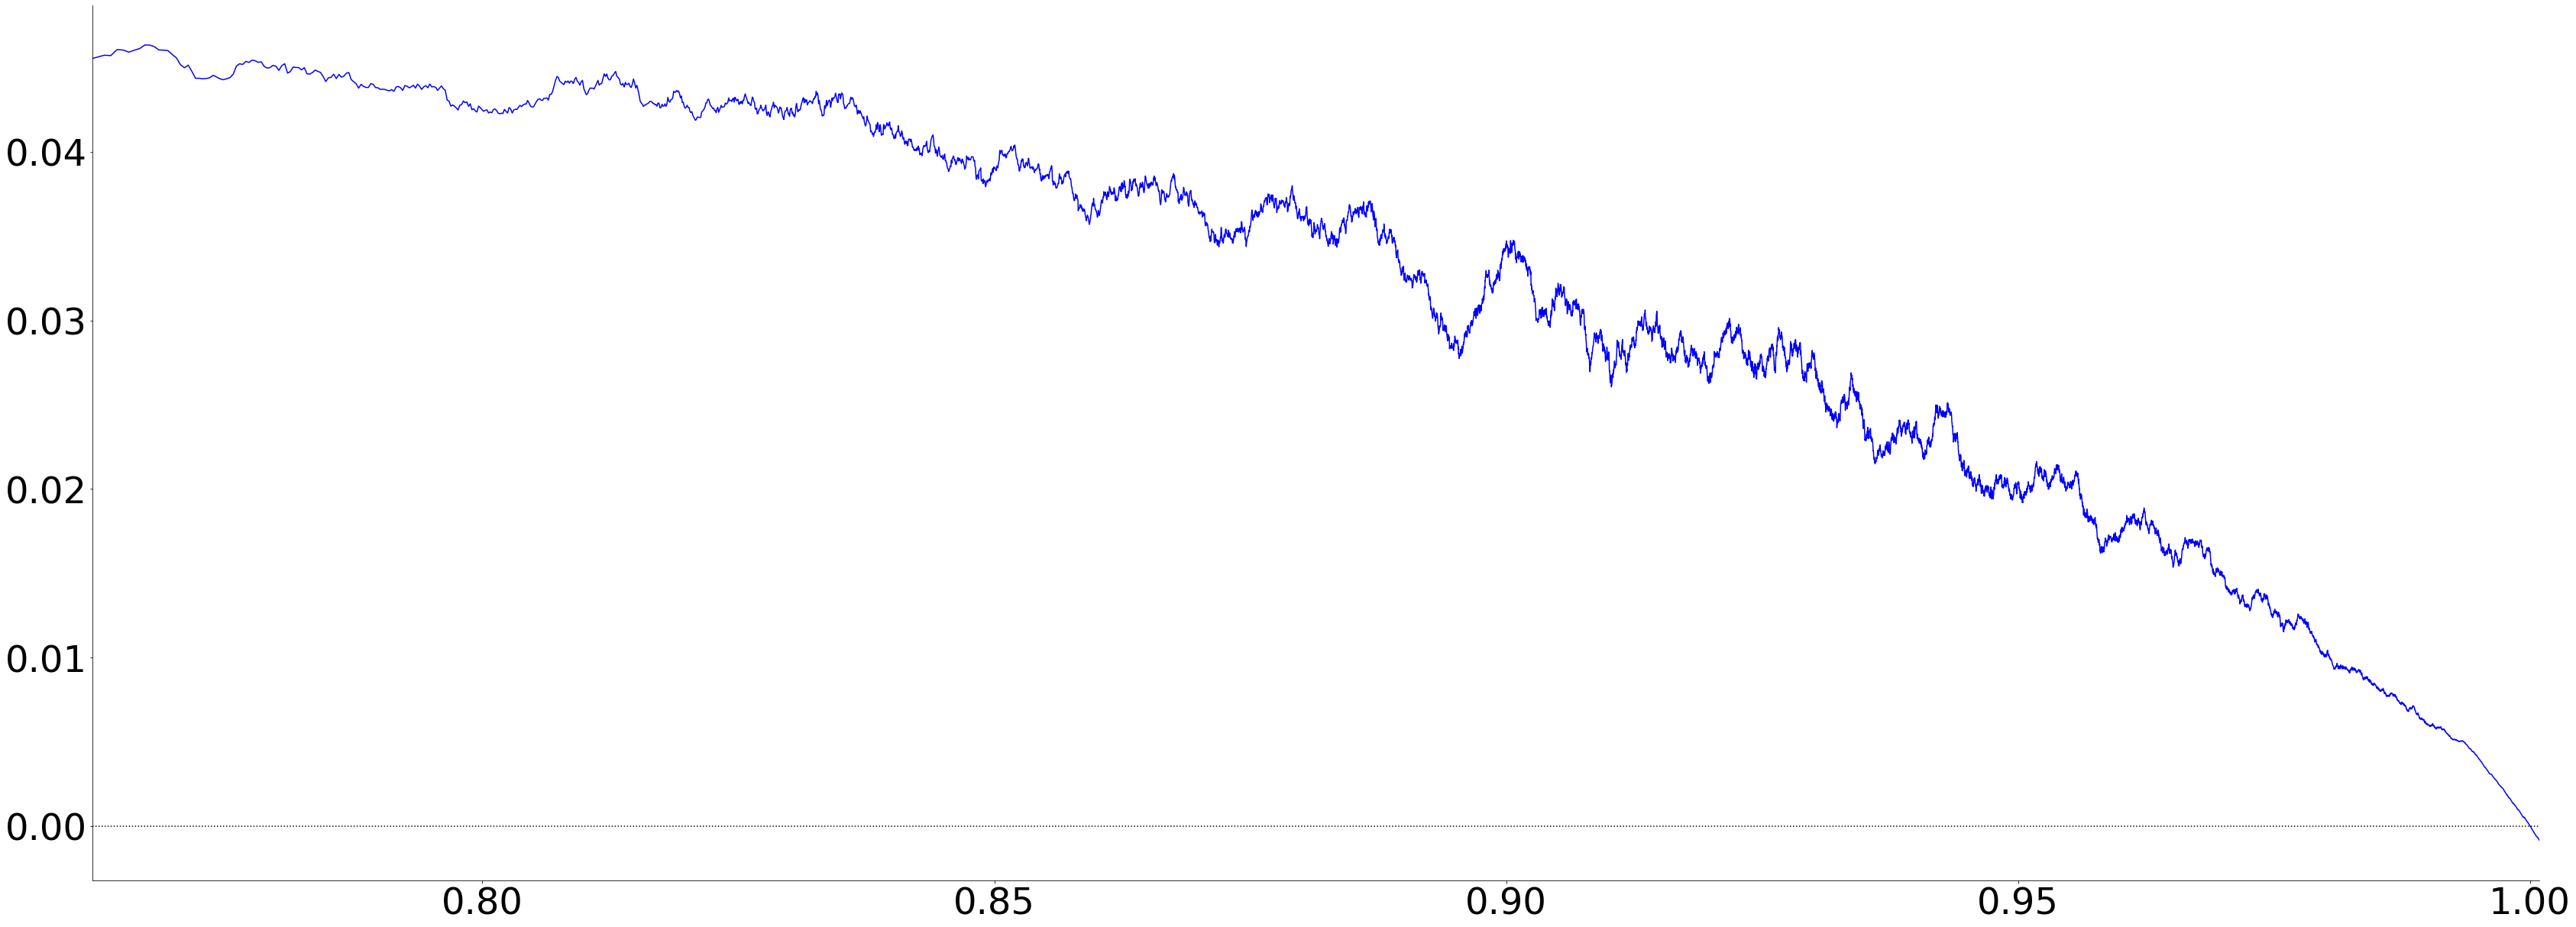

In [404]:
# Full Plot - see the issue of extreme underestimation in half the sample when showing full sample : hence restrict between 0.9 and 1.03 # 100
app_dist_250_3.index =app_dist_250_3["Theta^"]
plot_shrinkage(app_dist_250_3["Optimal Shrinkage"][:])

Either the OLS model, or perhaps a plot?

In [102]:
# Optimal Shrinkage as a function of the OLS estimate theta^
alpha_100_ninety = alpha_100[np.where(theta_100_3>0.90)]
sm.OLS(alpha_100,theta_100_3).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.681
Model:                            OLS   Adj. R-squared (uncentered):              0.681
Method:                 Least Squares   F-statistic:                          2.132e+04
Date:                Mon, 15 Mar 2021   Prob (F-statistic):                        0.00
Time:                        20:19:26   Log-Likelihood:                          11767.
No. Observations:               10000   AIC:                                 -2.353e+04
Df Residuals:                    9999   BIC:                                 -2.353e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1225      0.001    145.999      0.000       0.121       0.124
==============================================================================
Omnibus:                      389.991   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              434.146
Skew:                           0.506   Prob(JB):                     5.32e-95
Kurtosis:                       2.869   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
# Optimal Shrinkage as a function of the OLS estimate theta^
alpha_250_ninety = alpha_250[np.where(theta_250_3>0.90)]
sm.OLS(diff_250,theta_250_3).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.573
Model:                            OLS   Adj. R-squared (uncentered):              0.573
Method:                 Least Squares   F-statistic:                          1.343e+04
Date:                Mon, 15 Mar 2021   Prob (F-statistic):                        0.00
Time:                        20:40:03   Log-Likelihood:                          24132.
No. Observations:               10000   AIC:                                 -4.826e+04
Df Residuals:                    9999   BIC:                                 -4.825e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0272      0.000    115.909      0.000       0.027       0.028
==============================================================================
Omnibus:                     1809.300   Durbin-Watson:                   1.669
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3393.950
Skew:                           1.124   Prob(JB):                         0.00
Kurtosis:                       4.758   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
# Optimal Shrinkage as a function of the OLS estimate theta^
alpha_500_ninety = alpha_500[np.where(theta_500_3>0.90)]
sm.OLS(alpha_500,theta_500_3).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.729
Model:                            OLS   Adj. R-squared (uncentered):              0.729
Method:                 Least Squares   F-statistic:                          2.687e+04
Date:                Mon, 15 Mar 2021   Prob (F-statistic):                        0.00
Time:                        20:19:32   Log-Likelihood:                          20458.
No. Observations:               10000   AIC:                                 -4.091e+04
Df Residuals:                    9999   BIC:                                 -4.091e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0550      0.000    163.921      0.000       0.054       0.056
==============================================================================
Omnibus:                      832.547   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1124.556
Skew:                           0.705   Prob(JB):                    6.39e-245
Kurtosis:                       3.843   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1252]:
# PROBIT MODEL

theta_100_3_ninety = theta_100_3[np.where(theta_100_3>0.90)]
dm_100_3_ninety = dm_100_3[np.where(theta_100_3>0.90)]
alpha_100_ninety = alpha_100[np.where(theta_100_3>0.90)]

model = Probit(dm_100_3_ninety, sm.add_constant(theta_100_3_ninety))
probit_model = model.fit()
probit_model.summary()

Optimization terminated successfully.
         Current function value: 0.659307
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 5091
Model:                         Probit   Df Residuals:                     5089
Method:                           MLE   Df Model:                            1
Date:                Sun, 14 Mar 2021   Pseudo R-squ.:                0.004144
Time:                        13:37:35   Log-Likelihood:                -3356.5
converged:                       True   LL-Null:                       -3370.5
Covariance Type:            nonrobust   LLR p-value:                 1.254e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3644      0.578     -5.823      0.000      -4.497      -2.232
x1             3.2125      0.608      5.279      0.000       2.020       4.405
==============================================================================
"""

In [1256]:
# function expressing the probability of a dm rejection in terms of the estimated
print(norm.cdf(probit_model.params[0] + theta_100_3 * probit_model.params[1]))

# Value of theta at which it is better to approximate the distribution with a random walk
(norm.ppf(0.5) - probit_model.params[0]) / probit_model.params[1]

[0.256412   0.34688523 0.23375459 ... 0.43816002 0.43094855 0.23818905]


1.047309601132114

In [101]:
print("sample size = 100")
print("% of runs where the forecast is beaten by a random walk")
print(f" {np.mean(dm_100_3) * 100}%")
print()
print("Compared to previously:")
print(f"{np.round(np.mean(dm_100)*100,3)}%")
print()
print("A little better, but not as good as selecting for a unit root")

sample size = 100
% of runs where the forecast is beaten by a random walk
 39.44%

Compared to previously:
53.282%

A little better, but not as good as selecting for a unit root


In [100]:
print("sample size = 250")
print("% of runs where the forecast is beaten by a random walk ")
print(f" {np.mean(dm_250_3) * 100}%")
print()
print("Compared to previously:")
print(f"{np.round(np.mean(dm_250)*100,3)}%")
print()
print("A little better, but not as good as selecting for a unit root")

sample size = 250
% of runs where the forecast is beaten by a random walk 
 22.42%

Compared to previously:
36.101%

A little better, but not as good as selecting for a unit root


In [99]:
print("Sample size = 500")
print("% of runs where the forecast is beaten by a random walk ")
print(f" {np.mean(dm_500_3) * 100}%")
print()
print("Compared to previously:")
print(f"{np.round(np.mean(dm_500)*100,3)}%")
print()
print("A little better, but not as good as selecting for a unit root")

Sample size = 500
% of runs where the forecast is beaten by a random walk 
 11.08%

Compared to previously:
22.451%

A little better, but not as good as selecting for a unit root
